In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [2]:
def change_data(df):
    df=df.set_index("fecha")
    df.index = pd.to_datetime(df.index)
    df=df.replace("", np.NaN)
    df= df.astype(float,errors="ignore")
    
    return df

In [3]:
# Funciones de normalización
def minmax_norm(df_input,fecha_ini,fecha_fin):
    return (df_input - df_input[fecha_ini:fecha_fin].min()) / ( df_input[fecha_ini:fecha_fin].max() 
                                                               - df_input[fecha_ini:fecha_fin].min())

In [4]:
# Leemos las diferentes tablas de la base de datos y guardamos la información que nos interesa en DataFrame

con=sqlite3.connect('bases_datos/COVID.db')

#------------------------------
# Datos de la C. Valenciana
#------------------------------

data_CV=pd.read_sql_query("""
                        SELECT fecha,casos_24h,fallecidos_24h,casos_tot,fallecidos_tot,IA_14d,IA_7d
                        FROM datos_CV
                        """,con)
data_CV=change_data(data_CV)

data_CV_hosp_UCI=pd.read_sql_query("""
                        SELECT fecha,UCI,hospitalizados
                        FROM datos_CV_hosp_UCI
                        """,con)
data_CV_hosp_UCI=change_data(data_CV_hosp_UCI)

data_CV_sem=pd.read_sql_query("""
                        SELECT fecha,casos_24h,fallecidos_24h
                        FROM datos_CV_sem
                        """,con)
data_CV_sem=change_data(data_CV_sem)

data_CV_hombre_mujer=pd.read_sql_query("""
                        SELECT fecha,casos_24h_mujer,fallecidos_24h_mujer,casos_24h_hombre,fallecidos_24h_hombre
                        FROM datos_CV_hombre_mujer
                        """,con)
data_CV_hombre_mujer=change_data(data_CV_hombre_mujer)

data_CV_casos_edad=pd.read_sql_query("""
                        SELECT fecha,"0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"
                        FROM datos_CV_casos_edad
                        """,con)
data_CV_casos_edad=change_data(data_CV_casos_edad)

data_CV_por_casos_edad=pd.read_sql_query("""
                        SELECT fecha,"0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"
                        FROM datos_CV_por_casos_edad
                        """,con)
data_CV_por_casos_edad=change_data(data_CV_por_casos_edad)

data_CV_fallecidos_edad=pd.read_sql_query("""
                        SELECT fecha,"0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"
                        FROM datos_CV_fallecidos_edad
                        """,con)
data_CV_fallecidos_edad=change_data(data_CV_fallecidos_edad)

data_CV_por_fallecidos_edad=pd.read_sql_query("""
                        SELECT fecha,"0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"
                        FROM datos_CV_por_fallecidos_edad
                        """,con)
data_CV_por_fallecidos_edad=change_data(data_CV_por_fallecidos_edad)

data_CV_IA_14d_edad=pd.read_sql_query("""
                        SELECT fecha,"0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"
                        FROM datos_CV_IA_14d_edad
                        """,con)
data_CV_IA_14d_edad=change_data(data_CV_IA_14d_edad)

data_CV_IA_14d_sexo=pd.read_sql_query("""
                        SELECT fecha,"IA_14d_mujer","IA_14d_hombre"
                        FROM datos_CV_IA_14d_sexo
                        """,con)
data_CV_IA_14d_sexo=change_data(data_CV_IA_14d_sexo)

#-------------------------
# Datos de España
#-------------------------

data_ESP=pd.read_sql_query("""
                        SELECT fecha,casos_24h,fallecidos_24h,casos_tot,fallecidos_tot,IA_14d,IA_7d
                        FROM datos_ESP
                        """,con)
data_ESP=change_data(data_ESP)


data_ESP_hosp_UCI=pd.read_sql_query("""
                        SELECT fecha,UCI,hospitalizados
                        FROM datos_ESP_hosp_UCI
                        """,con)
data_ESP_hosp_UCI=change_data(data_ESP_hosp_UCI)

data_ESP_sem=pd.read_sql_query("""
                        SELECT fecha,casos_24h,fallecidos_24h
                        FROM datos_ESP_sem
                        """,con)
data_ESP_sem=change_data(data_ESP_sem)

#-------------------------
# Datos de Vacunación
#-------------------------

data_por_vac_tot=pd.read_sql_query("""
                        SELECT fecha,[C. Valenciana - 1 dosis],[C. Valenciana - 2 dosis],[España - 1 dosis],[España - 2 dosis]
                        FROM vac_ESP_VAL_por_tot_all_days
                        """,con)
data_por_vac_tot=change_data(data_por_vac_tot)


In [5]:
# Estimación de los promedios móviles.

days_ajust=7

data_CV_temp=data_CV.fillna(0)
data_CV_mov_avg=data_CV_temp.rolling(days_ajust).mean()

data_ESP_temp=data_ESP.fillna(0)
data_ESP_mov_avg=data_ESP_temp.rolling(days_ajust).mean()

data_CV_casos_edad_temp=data_CV_casos_edad.fillna(0)
data_CV_casos_edad_mov_avg=data_CV_casos_edad_temp.rolling(days_ajust).mean()

data_CV_fallecidos_edad_temp=data_CV_fallecidos_edad.fillna(0)
data_CV_fallecidos_edad_mov_avg=data_CV_fallecidos_edad_temp.rolling(days_ajust).mean()

days_ajust2=14

data_CV_por_casos_edad_temp=data_CV_por_casos_edad.fillna(0)
data_CV_por_casos_edad_mov_avg=data_CV_por_casos_edad_temp.rolling(days_ajust2).mean()

data_CV_por_fallecidos_edad_temp=data_CV_por_fallecidos_edad.fillna(0)
data_CV_por_fallecidos_edad_mov_avg=data_CV_por_fallecidos_edad_temp.rolling(days_ajust2).mean()


In [6]:
# NORMALIZACIÓN
#-----------------
# Para los casos y los fallecidos en vez de usar los datos tal cual, hemos usado el promedio movil para que la 
# curva sea más suave. Normalizamos al maximo/minimo de los datos desde el principio de la pandamia hasta
# Diciembre del 2021 para dejar fuera Ommicron

fecha_ini="2020-03-21"
fecha_fin="2021-12-01"

data_CV_norm = minmax_norm(data_CV_mov_avg,fecha_ini,fecha_fin)
data_CV_hosp_UCI_norm = minmax_norm(data_CV_hosp_UCI,fecha_ini,fecha_fin)


data_ESP_norm = minmax_norm(data_ESP_mov_avg,fecha_ini,fecha_fin)
data_ESP_hosp_UCI_norm = minmax_norm(data_ESP_hosp_UCI,fecha_ini,fecha_fin)


In [7]:
# Parámetros que vamos a usar para crear la caja donde se va a poner el texto en la figura
bbox_args = dict(boxstyle="round4",fc="w")


In [44]:
# Ajustes de las gráficas
color_CV="slategray"
color_ESP="darkorange"

color_IA14d="brown"
color_IA7d="darkgoldenrod"
color_hosp="olive"
color_UCI='tomato'
color_casos="darkcyan"
color_fallecidos='purple'

color_vac=["darkred","steelblue","darkolivegreen","indigo"]

lines="black"

color_edad=["black","darkred","chocolate","gold","olive","deepskyblue","gray","navy","darkviolet","lightpink"]
color_sexo=["darkred","teal"]

line_style_edad=['-.', '--', '-.', '-',':', '-', '-.', ':','--','-']
line_style_sexo=["-",":"]

step_fecha=10

## Datos de la C. Valenciana y España con datos agregados de rango de edad y sexo

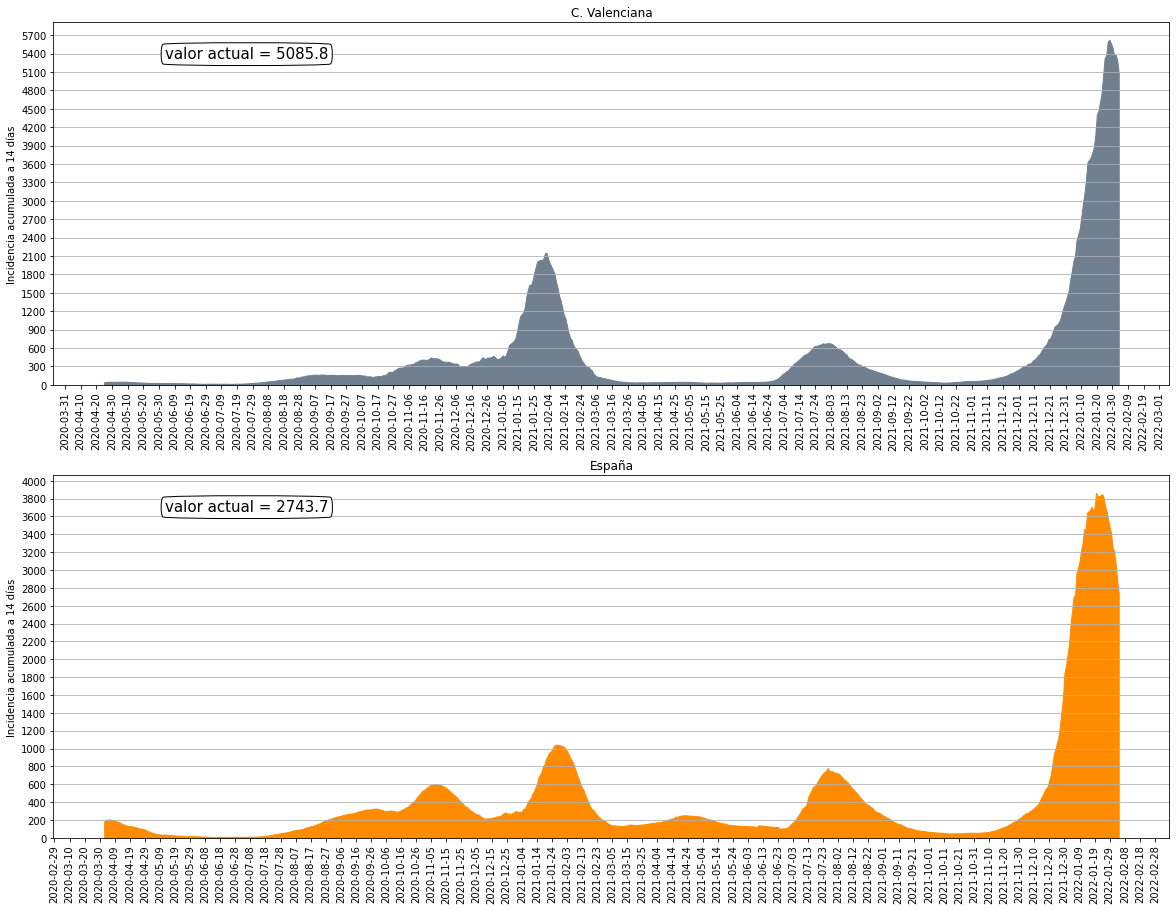

In [45]:
# GRAFICAS PARA LA IA a 14d
#------------------------------

# Gráficas de los datos 
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.25)
# fig.autofmt_xdate()

# C. Valenciana
axs[0].stackplot(data_CV.index,data_CV["IA_14d"],color=color_CV)

axs[0].set_ylabel('Incidencia acumulada a 14 días')
starty, endy = axs[0].get_ylim()
axs[0].yaxis.set_ticks(np.arange(starty, endy, 300))
axs[0].yaxis.grid()
axs[0].set_title('C. Valenciana')
axs[0].tick_params(axis='x', rotation=90)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

axs[0].annotate("valor actual = {:.1f}".format(data_CV["IA_14d"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

# España
axs[1].stackplot(data_ESP.index,data_ESP["IA_14d"],color=color_ESP)

axs[1].set_ylabel('Incidencia acumulada a 14 días')
starty, endy = axs[1].get_ylim()
axs[1].set_ylim((0,endy))
axs[1].yaxis.set_ticks(np.arange(0, endy, 200))
axs[1].yaxis.grid()
axs[1].set_title('España')

axs[1].annotate("valor actual = {:.1f}".format(data_ESP["IA_14d"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[1].tick_params(axis='x', rotation=90)


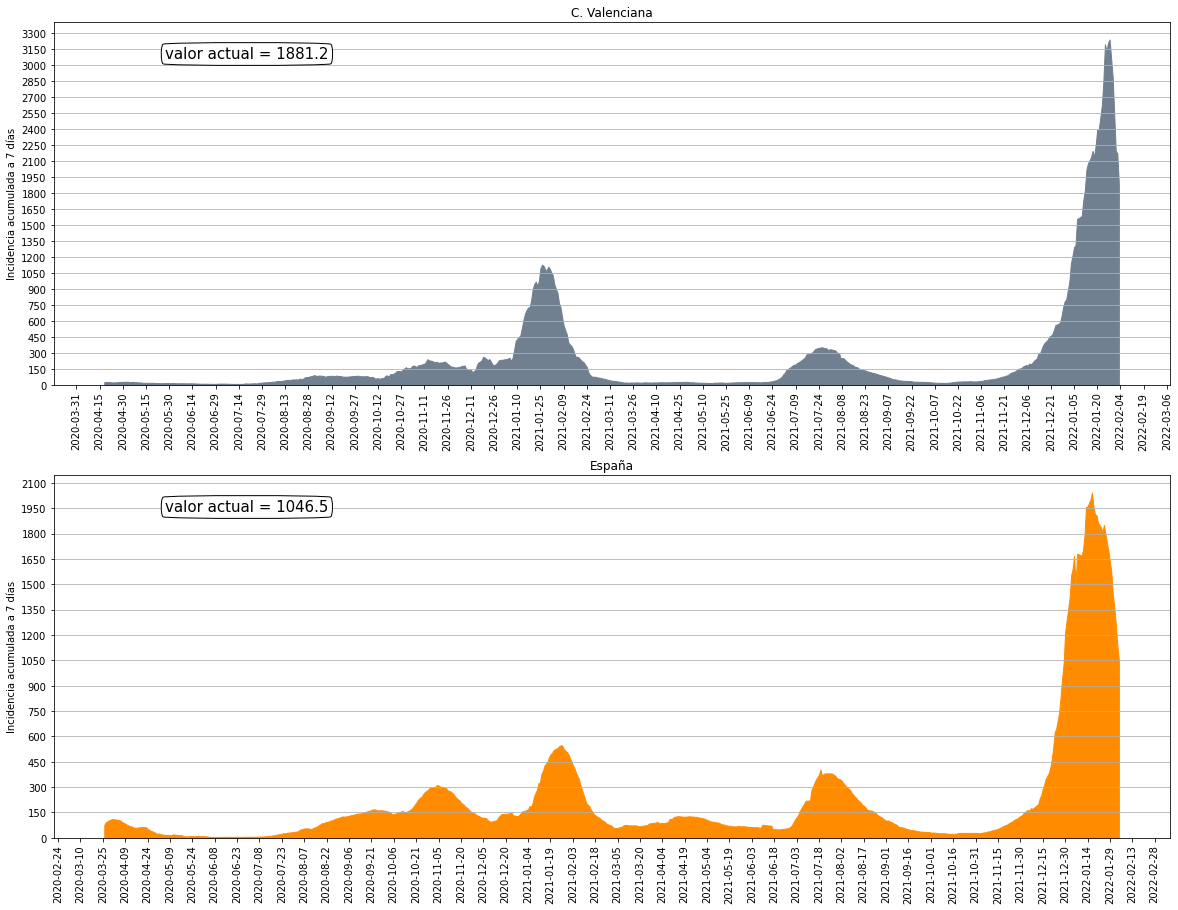

In [43]:
# GRAFICAS PARA LA IA a 7d
#------------------------------


# Gráficas de los datos + ajuste de los datos usando la descomposición estacional mediante promedios móviles.
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.25)

# C. Valenciana
axs[0].stackplot(data_CV.index,data_CV["IA_7d"],color=color_CV)

axs[0].set_ylabel('Incidencia acumulada a 7 días')
# axs[0].xaxis.grid()
starty, endy = axs[0].get_ylim()
#axs[0].set_ylim((0,endy)
axs[0].yaxis.set_ticks(np.arange(starty, endy, 150))
axs[0].yaxis.grid()
axs[0].set_title('C. Valenciana')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[0].tick_params(axis='x', rotation=90)

axs[0].annotate("valor actual = {:.1f}".format(data_CV["IA_7d"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

# España
axs[1].stackplot(data_ESP.index,data_ESP["IA_7d"],color=color_ESP)

axs[1].set_ylabel('Incidencia acumulada a 7 días')
starty, endy = axs[1].get_ylim()
axs[1].set_ylim((0,endy))
axs[1].yaxis.set_ticks(np.arange(0, endy, 150))
axs[1].yaxis.grid()
axs[1].set_title('España')

axs[1].annotate("valor actual = {:.1f}".format(data_ESP["IA_7d"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[1].tick_params(axis='x', rotation=90)

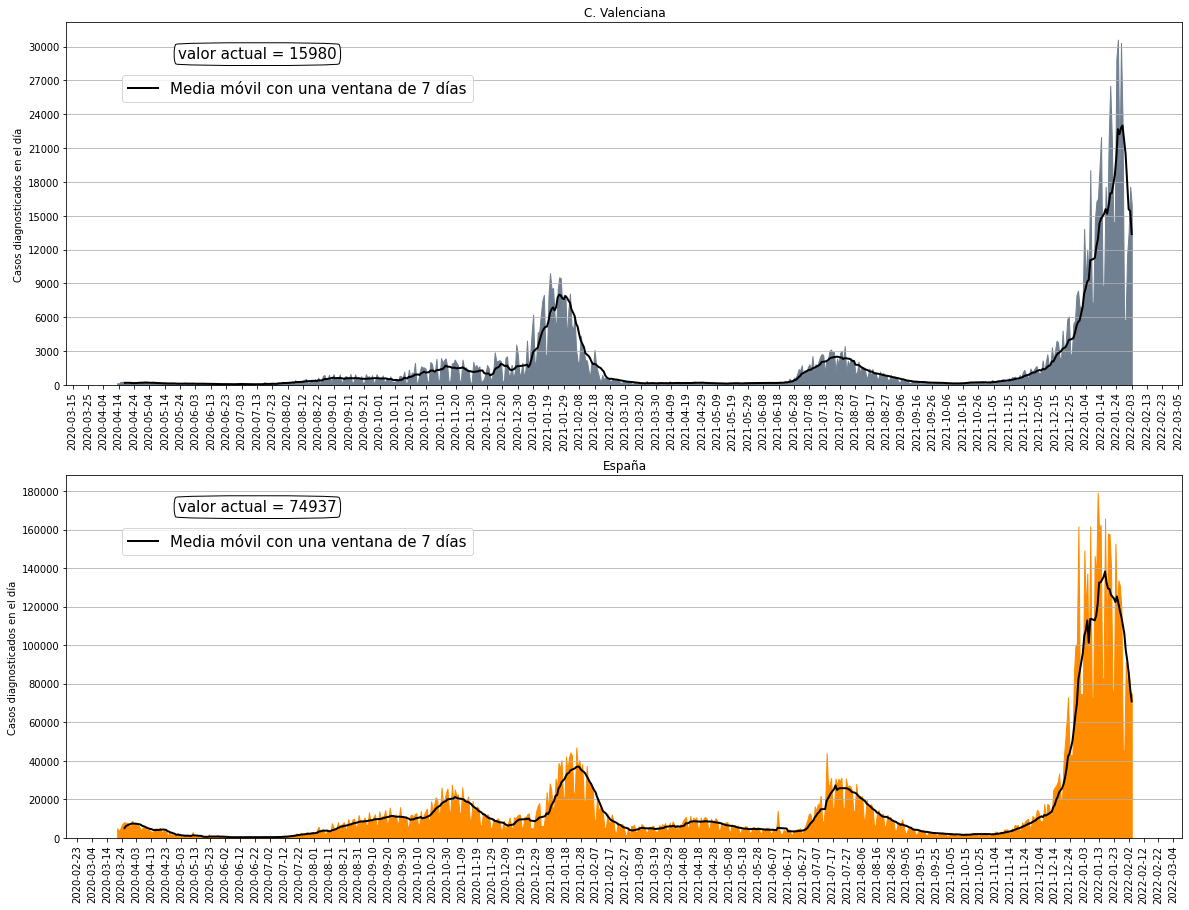

In [47]:
# GRAFICAS PARA LOS CASOS
#------------------------------


# Gráficas de los datos + ajuste de los datos usando la descomposición estacional mediante promedios móviles.
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15))
fig.subplots_adjust(hspace=0.25)

# C. Valenciana
axs[0].stackplot(data_CV.index,data_CV["casos_24h"],color=color_CV)
axs[0].plot(data_CV_mov_avg.index, data_CV_mov_avg["casos_24h"], c=lines,linewidth=2
            ,label="Media móvil con una ventana de " + str(days_ajust) + " días")

axs[0].legend(fontsize=15, loc=(0.05,0.78))

axs[0].set_ylabel('Casos diagnosticados en el día')
starty, endy = axs[0].get_ylim()
axs[0].yaxis.set_ticks(np.arange(starty, endy, 3000))
axs[0].yaxis.grid()
axs[0].set_title('C. Valenciana')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[0].tick_params(axis='x', rotation=90)

axs[0].annotate("valor actual = {:.0f}".format(data_CV["casos_24h"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

# España
axs[1].stackplot(data_ESP.index,data_ESP["casos_24h"],color=color_ESP)
axs[1].plot(data_ESP_mov_avg.index, data_ESP_mov_avg["casos_24h"], c=lines,linewidth=2,label="Media móvil con una ventana de "
            + str(days_ajust) + " días")
axs[1].legend(fontsize=15, loc=(0.05,0.78))

axs[1].set_ylabel('Casos diagnosticados en el día')
# axs[1].xaxis.grid()
starty, endy = axs[1].get_ylim()
axs[1].set_ylim((0,endy))
axs[1].yaxis.set_ticks(np.arange(0, endy, 20000))
axs[1].yaxis.grid()
axs[1].set_title('España')

axs[1].annotate("valor actual = {:.0f}".format(data_ESP["casos_24h"].iloc[-1])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[1].tick_params(axis='x', rotation=90)

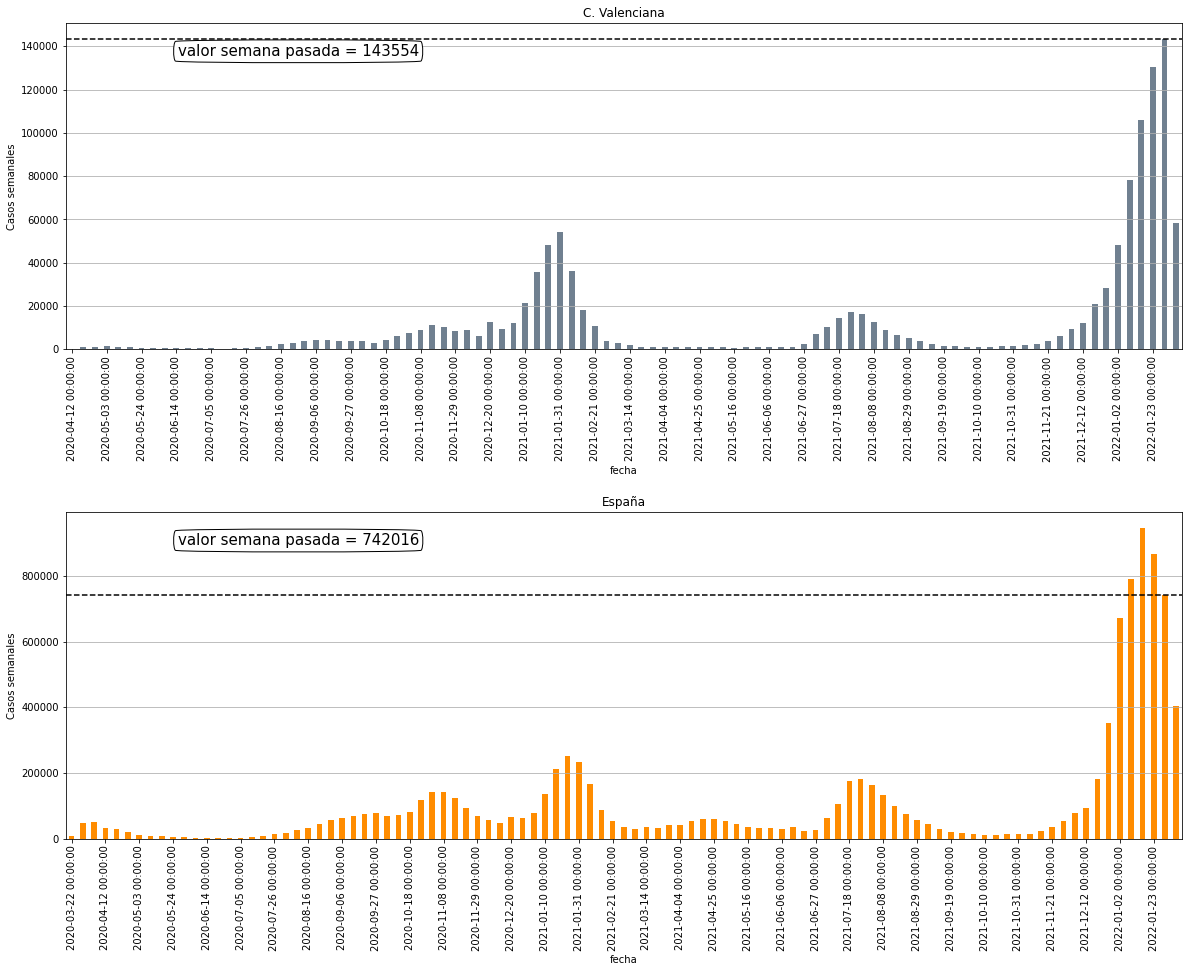

In [12]:
# Gráfica casos semanales
#----------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15))
fig.subplots_adjust(hspace=0.5)

# C. Valenciana
data_CV_sem["casos_24h"].plot.bar(rot=90,ax=axs[0],color=color_CV)
axs[0].axhline(y=data_CV_sem["casos_24h"].iloc[-2],color=lines,linestyle="--",linewidth=1.5)
axs[0].set_title('C. Valenciana')
axs[0].set_ylabel('Casos semanales')
starty, endy = axs[0].get_ylim()
axs[0].yaxis.grid()
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[0].tick_params(axis='x', rotation=90)

axs[0].annotate("valor semana pasada = {:.0f}".format(data_CV_sem["casos_24h"].iloc[-2])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# España
data_ESP_sem["casos_24h"].plot.bar(rot=90,ax=axs[1],color=color_ESP)
axs[1].axhline(y=data_ESP_sem["casos_24h"].iloc[-2],color=lines,linestyle="--",linewidth=1.5)
axs[1].set_title('España')
axs[1].set_ylabel('Casos semanales')
starty, endy = axs[1].get_ylim()
axs[1].yaxis.grid()

axs[1].annotate("valor semana pasada = {:.0f}".format(data_ESP_sem["casos_24h"].iloc[-2])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[1].tick_params(axis='x', rotation=90)


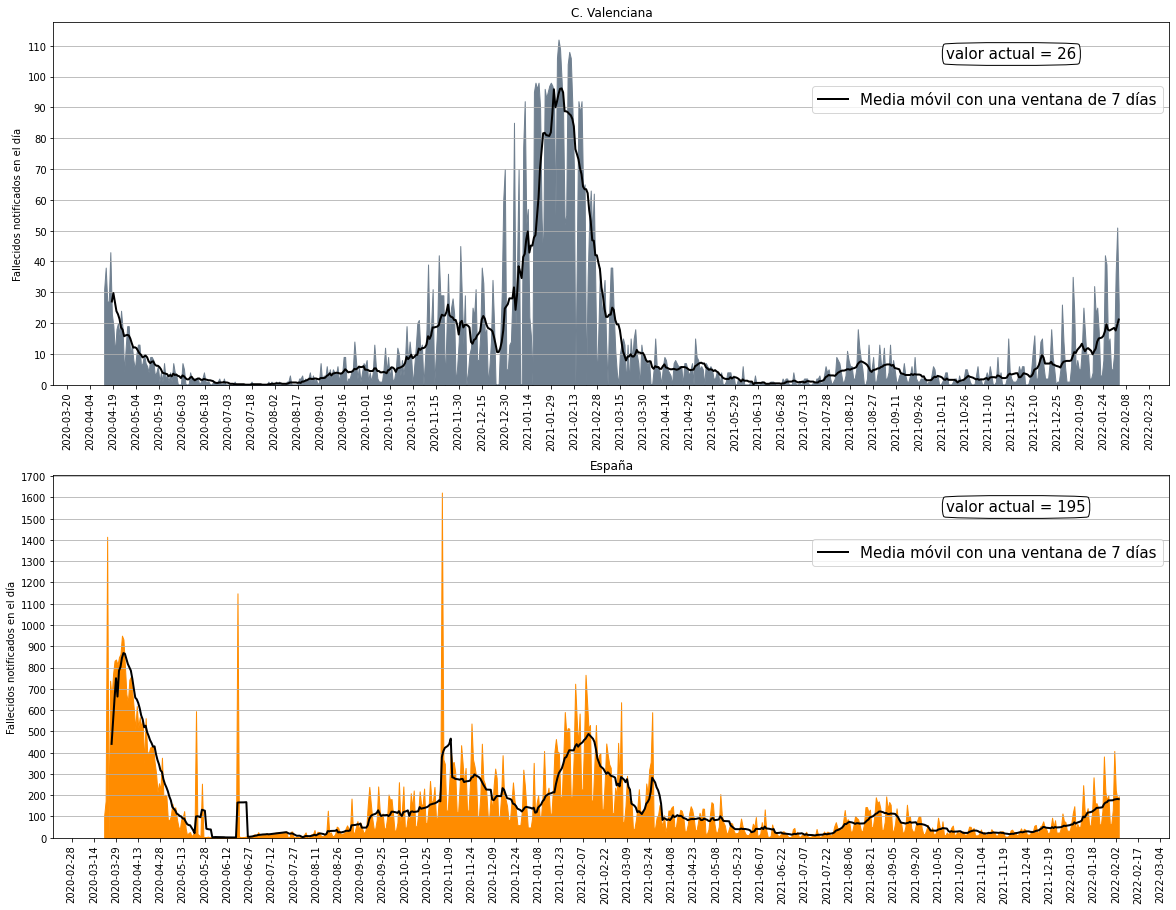

In [13]:
# GRAFICAS PARA LOS FALLECIDOS
#------------------------------


# Gráficas de los datos + ajuste de los datos usando la descomposición estacional mediante promedios móviles.
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.25)

# C. Valenciana
axs[0].stackplot(data_CV.index,data_CV["fallecidos_24h"],color=color_CV)
axs[0].plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"], c=lines,linewidth=2,
            label="Media móvil con una ventana de "+ str(days_ajust) + " días")

axs[0].set_ylabel('Fallecidos notificados en el día')
# axs[0].xaxis.grid()
starty, endy = axs[0].get_ylim()
#axs[0].set_ylim((0,endy)
axs[0].yaxis.set_ticks(np.arange(starty, endy, 10))
axs[0].yaxis.grid()
axs[0].set_title('C. Valenciana')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[0].tick_params(axis='x', rotation=90)

axs[0].annotate("valor actual = {:.0f}".format(data_CV["fallecidos_24h"].iloc[-1])
                  ,xy=(0.80, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

axs[0].legend(fontsize=15, loc=(0.68,0.75))

# España
axs[1].stackplot(data_ESP.index,data_ESP["fallecidos_24h"],color=color_ESP)
axs[1].plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"], c=lines,linewidth=2,
            label="Media móvil con una ventana de "+ str(days_ajust) + " días")

axs[1].legend(fontsize=15, loc=(0.68,0.75))

axs[1].set_ylabel('Fallecidos notificados en el día')
# axs[1].xaxis.grid()
starty, endy = axs[1].get_ylim()
axs[1].set_ylim((0,endy))
axs[1].yaxis.set_ticks(np.arange(0, endy, 100))
axs[1].yaxis.grid()
axs[1].set_title('España')

axs[1].annotate("valor actual = {:.0f}".format(data_ESP["fallecidos_24h"].iloc[-1])
                  ,xy=(0.80, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[1].tick_params(axis='x', rotation=90)

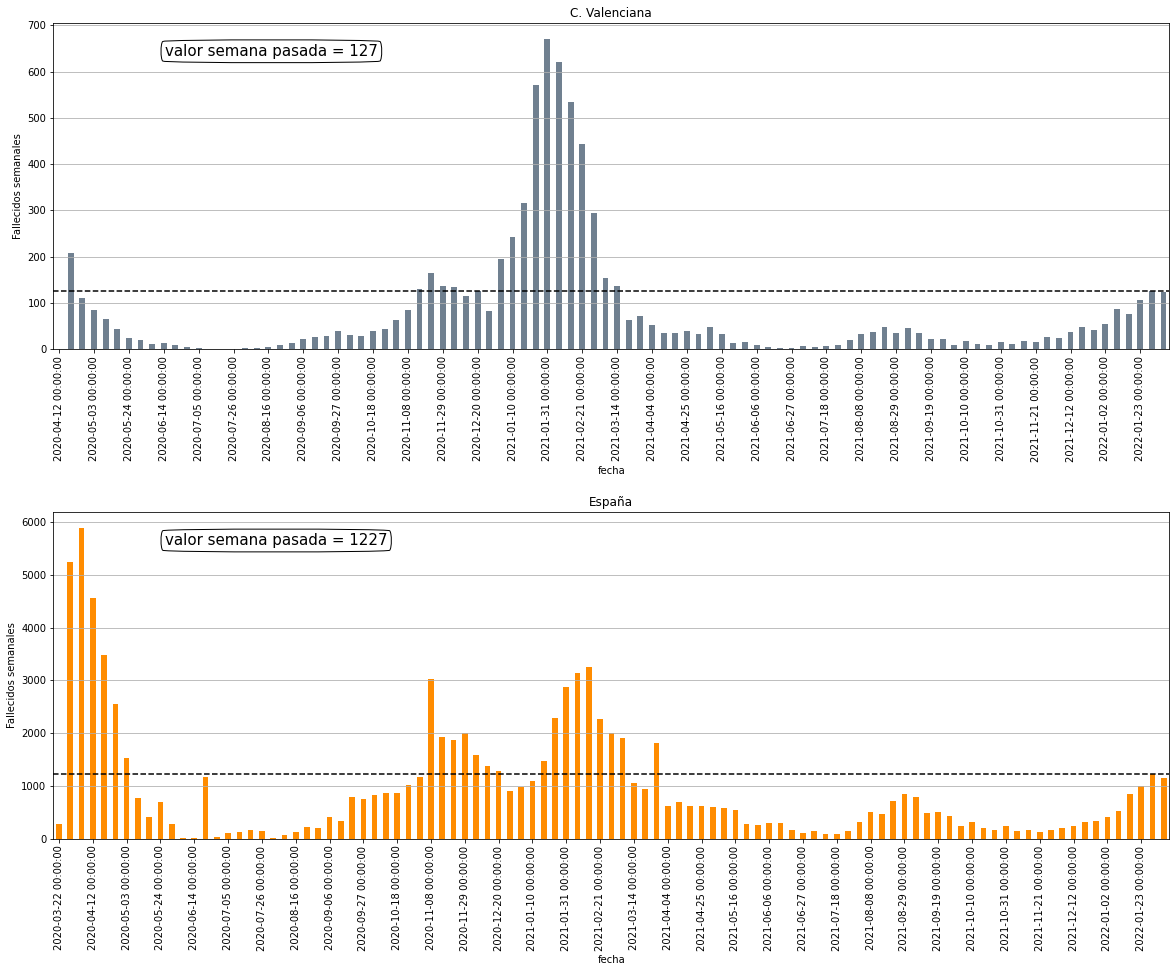

In [14]:
# Gráfica Fallecidos semanales
#----------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.5)

# C. Valenciana
data_CV_sem["fallecidos_24h"].plot.bar(rot=90,ax=axs[0],color=color_CV)
axs[0].axhline(y=data_CV_sem["fallecidos_24h"].iloc[-2],color=lines,linestyle="--",linewidth=1.5)
axs[0].set_title('C. Valenciana')
axs[0].set_ylabel('Fallecidos semanales')
starty, endy = axs[0].get_ylim()
axs[0].yaxis.grid()
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[0].tick_params(axis='x', rotation=90)

axs[0].annotate("valor semana pasada = {:.0f}".format(data_CV_sem["fallecidos_24h"].iloc[-2])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)



# España
data_ESP_sem["fallecidos_24h"].plot.bar(rot=90,ax=axs[1],color=color_ESP)
axs[1].axhline(y=data_ESP_sem["fallecidos_24h"].iloc[-2],color=lines,linestyle="--",linewidth=1.5)
axs[1].set_title('España')
axs[1].set_ylabel('Fallecidos semanales')
starty, endy = axs[1].get_ylim()
axs[1].yaxis.grid()

axs[1].annotate("valor semana pasada = {:.0f}".format(data_ESP_sem["fallecidos_24h"].iloc[-2])
                  ,xy=(0.10, 0.9), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axs[1].tick_params(axis='x', rotation=90)

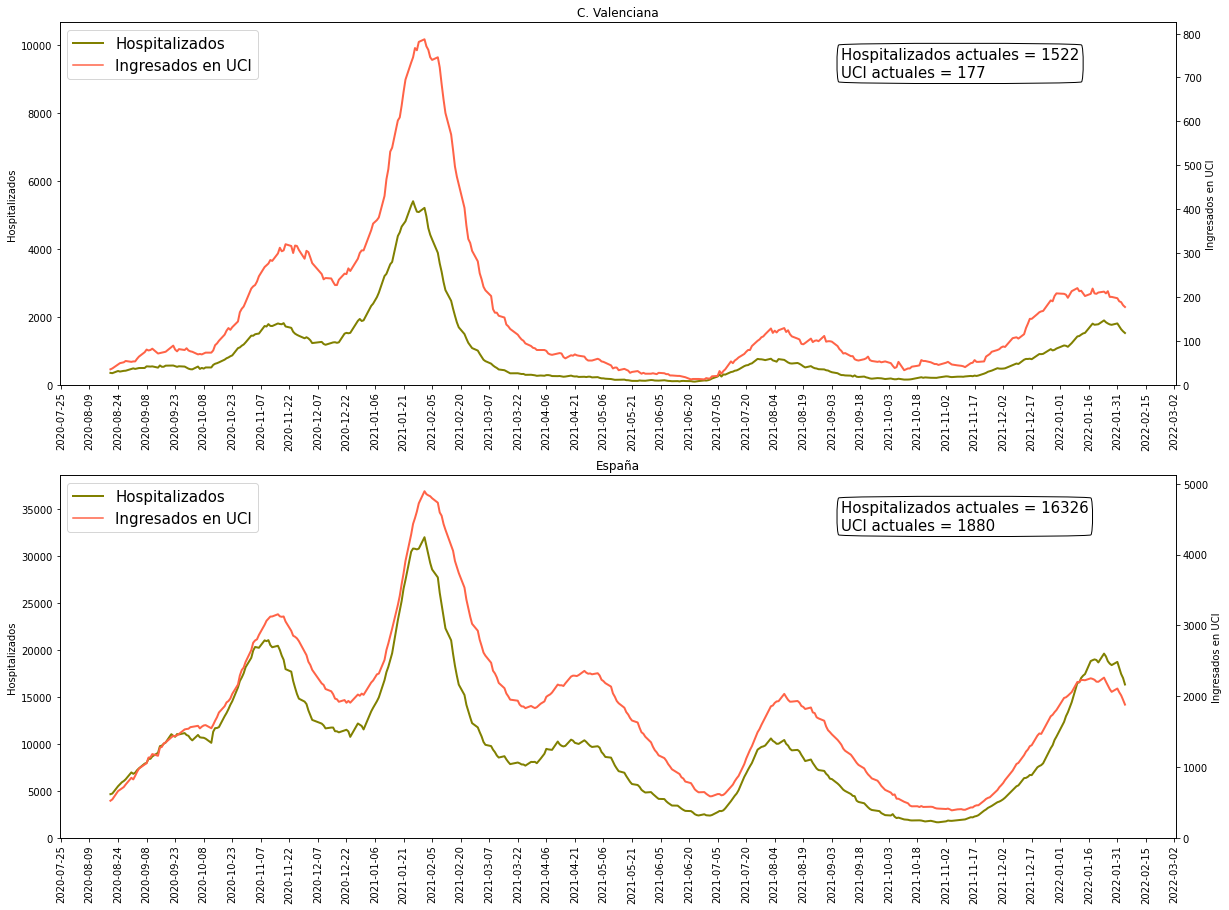

In [15]:
# Gráfica Hospitalizados y UCI
#----------------------------------------------------------

fig, (ax11,ax12) = plt.subplots(2,1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.25)

ax21=ax11.twinx()
ax22=ax12.twinx()

# C. Valenciana
ax11.plot(data_CV_hosp_UCI.index, data_CV_hosp_UCI["hospitalizados"],color=color_hosp,linewidth=2
          ,label="Hospitalizados")
ax11.plot(data_CV_hosp_UCI.index, data_CV_hosp_UCI["UCI"]*0-100000,c=color_UCI,
          label="Ingresados en UCI") # Solo para la leyenda
ax21.plot(data_CV_hosp_UCI.index, data_CV_hosp_UCI["UCI"], c=color_UCI,linewidth=2)

ax11.annotate("Hospitalizados actuales = {:.0f}\nUCI actuales = {:.0f}".format(data_CV_hosp_UCI["hospitalizados"].iloc[-1],
                                                                      data_CV_hosp_UCI["UCI"].iloc[-1])
                  ,xy=(0.70, 0.85), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


ax11.legend(fontsize=15, loc="upper left")

ax11.set_ylabel('Hospitalizados')
ax21.set_ylabel("Ingresados en UCI")
starty11, endy11 = ax11.get_ylim()
ax11.set_ylim((0,endy11))
starty21, endy21 = ax21.get_ylim()
ax21.set_ylim((0,endy21))
ax11.set_title('C. Valenciana')
ax11.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax11.tick_params(axis='x', rotation=90)

# España
ax12.plot(data_ESP_hosp_UCI.index, data_ESP_hosp_UCI["hospitalizados"],color=color_hosp,linewidth=2
          ,label="Hospitalizados")
ax12.plot(data_ESP_hosp_UCI.index, data_ESP_hosp_UCI["UCI"]*0-100000,c=color_UCI,
          label="Ingresados en UCI") # Solo para la leyenda
ax22.plot(data_ESP_hosp_UCI.index, data_ESP_hosp_UCI["UCI"], c=color_UCI,linewidth=2)

ax12.annotate("Hospitalizados actuales = {:.0f}\nUCI actuales = {:.0f}".format(data_ESP_hosp_UCI["hospitalizados"].iloc[-1],
                                                                      data_ESP_hosp_UCI["UCI"].iloc[-1])
                  ,xy=(0.70, 0.85), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


ax12.legend(fontsize=15, loc="upper left")

ax12.set_ylabel('Hospitalizados')
ax22.set_ylabel("Ingresados en UCI")
starty12, endy12 = ax12.get_ylim()
ax12.set_ylim((0,endy12))
starty22, endy22 = ax22.get_ylim()
ax22.set_ylim((0,endy22))
ax12.set_title('España')
ax12.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax12.tick_params(axis='x', rotation=90)

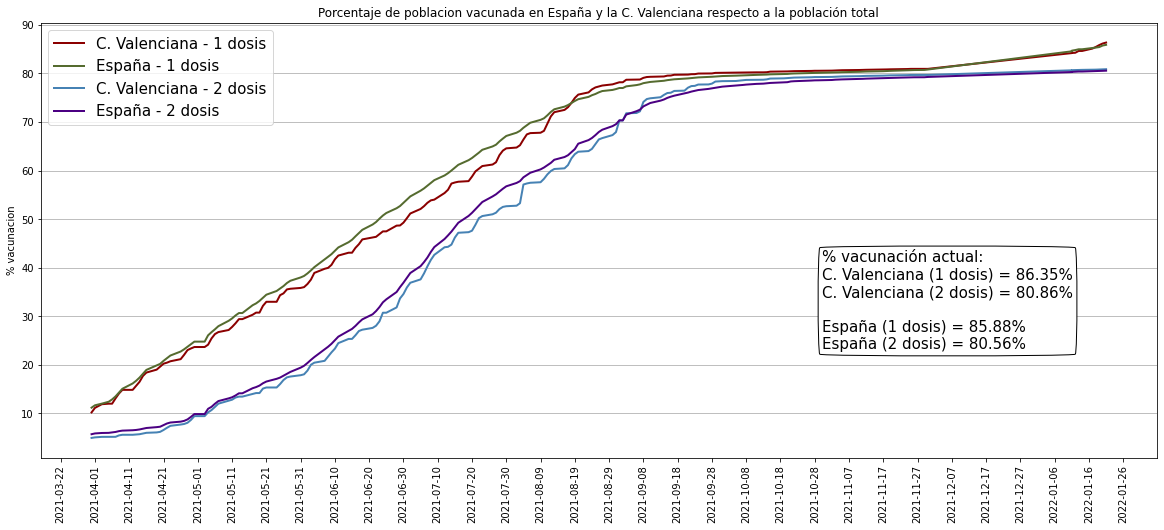

In [16]:
fig,ax = plt.subplots(1,1,figsize=(20,8),sharex=False)

ax.plot(data_por_vac_tot.index, data_por_vac_tot["C. Valenciana - 1 dosis"],c=color_vac[0],linewidth=2,
          label="C. Valenciana - 1 dosis")
ax.plot(data_por_vac_tot.index, data_por_vac_tot["España - 1 dosis"],c=color_vac[2],linewidth=2,
          label="España - 1 dosis")
ax.plot(data_por_vac_tot.index, data_por_vac_tot["C. Valenciana - 2 dosis"],c=color_vac[1],linewidth=2,
          label="C. Valenciana - 2 dosis")
ax.plot(data_por_vac_tot.index, data_por_vac_tot["España - 2 dosis"],c=color_vac[3],linewidth=2,
          label="España - 2 dosis")

ax.legend(fontsize=15, loc="upper left")

ax.annotate("% vacunación actual:\nC. Valenciana (1 dosis) = {:.2f}%\nC. Valenciana (2 dosis) = {:.2f}%\n\nEspaña (1 dosis) = {:.2f}%\nEspaña (2 dosis) = {:.2f}%"
              .format(data_por_vac_tot["C. Valenciana - 1 dosis"].iloc[-1],
                      data_por_vac_tot["C. Valenciana - 2 dosis"].iloc[-1],
                      data_por_vac_tot["España - 1 dosis"].iloc[-1],
                      data_por_vac_tot["España - 2 dosis"].iloc[-1]),
              xy=(0.70, 0.25), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

ax.set_ylabel('% vacunacion')
ax.set_title('Porcentaje de poblacion vacunada en España y la C. Valenciana respecto a la población total')
ax.yaxis.grid()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.tick_params(axis='x', rotation=90)

### Gráficas para un análisis más detallado

In [17]:
# Rango de fechas para las olas
olas_ESP=[(data_ESP.index[0],"2020-07-01"),("2020-08-01","2020-12-12"),("2020-12-15","2021-03-30"),
     ("2021-04-01","2021-06-01"),("2021-06-15","2021-10-01"),("2021-12-01",data_ESP.index[-1])]

olas_CV=[(data_CV.index[0],"2020-07-01"),("2020-08-01","2020-12-12"),("2020-12-15","2021-06-01"),
     ("2021-06-15","2021-10-01"),("2021-12-01",data_CV.index[-1])]

p_ESP=47351567
p_CV=4975000

In [18]:
# Calculo de la mortalidad para cada ola
#--------------------------------------

mor_ESP_olas=[None]*len(olas_ESP)
for i in range(len(olas_ESP)):
    mor_ESP_olas[i]=(data_ESP[olas_ESP[i][0]:olas_ESP[i][1]]["fallecidos_24h"].sum()*1e5)/p_ESP
    
mor_CV_olas=[None]*len(olas_CV)
for i in range(len(olas_CV)):
    mor_CV_olas[i]=(data_CV[olas_CV[i][0]:olas_CV[i][1]]["fallecidos_24h"].sum()*1e5)/p_CV
mor_CV_olas_temp=mor_CV_olas[0:3]+[None]+mor_CV_olas[3:]

# Creamos el Dataframe donde guardamos los datos de la mortalidad para la C. Valenciana y España en cada ola
data=[["ola 1"],["ola 2"],["ola 3"],["ola 4"],["ola 5"],["ola 6"]]
mor=pd.DataFrame(data,columns=["olas"])
mor["C. Valenciana"]=mor_CV_olas_temp
mor["España"]=mor_ESP_olas

mor=mor.set_index("olas")

In [19]:
# Calculo de la letalidad para cada ola
#--------------------------------------

let_ESP_olas=[None]*len(olas_ESP)
for i in range(len(olas_ESP)):
    let_ESP_olas[i]=(data_ESP[olas_ESP[i][0]:olas_ESP[i][1]]["fallecidos_24h"].sum()/
              data_ESP[olas_ESP[i][0]:olas_ESP[i][1]]["casos_24h"].sum())*100
    
let_CV_olas=[None]*len(olas_CV)
for i in range(len(olas_CV)):
    let_CV_olas[i]=(data_CV[olas_CV[i][0]:olas_CV[i][1]]["fallecidos_24h"].sum()/
              data_CV[olas_CV[i][0]:olas_CV[i][1]]["casos_24h"].sum())*100
let_CV_olas_temp=let_CV_olas[0:3]+[None]+let_CV_olas[3:]

# Creamos el Dataframe donde guardamos los datos de la mortalidad para la C. Valenciana y España en cada ola
data=[["ola 1"],["ola 2"],["ola 3"],["ola 4"],["ola 5"],["ola 6"]]
let=pd.DataFrame(data,columns=["olas"])
let["C. Valenciana"]=let_CV_olas_temp
let["España"]=let_ESP_olas

let=let.set_index("olas")


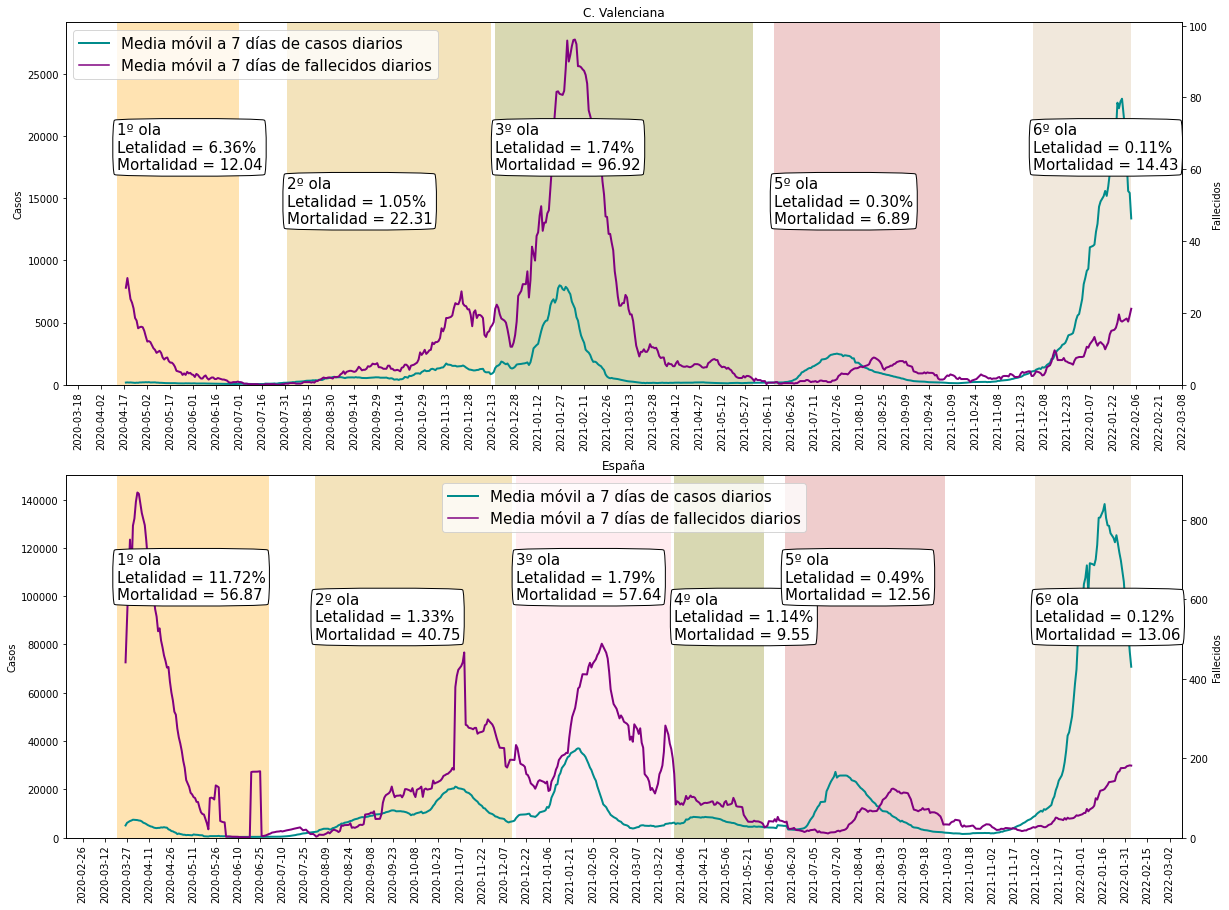

In [20]:
# Gráfica de casos y fallecidos diarios con los datos de la letalidad y la mortalidad por cada ola para C. Valenciana 
# y España
#-------------------------------------------------------------------------------------------------------------

fig, (ax11,ax12) = plt.subplots(2,1,figsize=(20,15))
fig.subplots_adjust(hspace=0.25)

ax21=ax11.twinx()
ax22=ax12.twinx()

# C. Valenciana
ax11.plot(data_CV_mov_avg.index, data_CV_mov_avg["casos_24h"],color=color_casos,linewidth=2
          ,label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
ax11.plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"]*0-100000,c=color_fallecidos,
          label="Media móvil a "+ str(days_ajust) + " días de fallecidos diarios") # Solo para la leyenda
ax21.plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2)

ax11.legend(fontsize=15, loc="upper left")

ax11.set_ylabel('Casos')
ax21.set_ylabel("Fallecidos")
starty11, endy11 = ax11.get_ylim()
ax11.set_ylim((0,endy11))
starty21, endy21 = ax21.get_ylim()
ax21.set_ylim((0,endy21))
ax11.set_title('C. Valenciana')
ax11.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax11.tick_params(axis='x', rotation=90)

# Escribimos la letalidad de cada ola en la gráfica
t=[60,45,60,45,60,45]
color_CV_olas=["orange","goldenrod","olive","indianred","tan"]
l_CV=["1º ola","2º ola","3º ola","5º ola","6º ola"]

for i in range(len(olas_CV)):
    ax11.axvspan(olas_CV[i][0],olas_CV[i][1], facecolor=color_CV_olas[i], alpha=0.3,label=l_CV[i])
    ax21.annotate(str(l_CV[i])+"\nLetalidad = {:.2f}%".format(let_CV_olas[i])+
                  "\nMortalidad = {:.2f}".format(mor_CV_olas[i])
                  ,xy=(olas_CV[i][0], t[i]), xycoords='data',fontsize=15,color="black",bbox=bbox_args)


# España
ax12.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["casos_24h"],color=color_casos,linewidth=2
          ,label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
ax12.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"]*0-100000,c=color_fallecidos,
          label="Media móvil a "+ str(days_ajust) + " días de fallecidos diarios") # Solo para la leyenda
ax22.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2)

ax12.legend(fontsize=15, loc="upper center")
ax12.set_ylabel('Casos')
ax22.set_ylabel("Fallecidos")
starty12, endy12 = ax12.get_ylim()
ax12.set_ylim((0,endy12))
starty22, endy22 = ax22.get_ylim()
ax22.set_ylim((0,endy22))
ax12.set_title('España')
ax12.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax12.tick_params(axis='x', rotation=90)

# Representamos la letalidad y la mortalidad de cada ola en la gráfica
t=[600,500,600,500,600,500]
color_ESP_olas=["orange","goldenrod","pink","olive","indianred","tan"]
l_ESP=["1º ola","2º ola","3º ola","4º ola","5º ola","6º ola"]

for i in range(len(olas_ESP)):
    ax12.axvspan(olas_ESP[i][0],olas_ESP[i][1], facecolor=color_ESP_olas[i], alpha=0.3,label=l_ESP[i])
    ax22.annotate(str(l_ESP[i])+"\nLetalidad = {:.2f}%".format(let_ESP_olas[i])+
                  "\nMortalidad = {:.2f}".format(mor_ESP_olas[i])
                  ,xy=(olas_ESP[i][0], t[i]), xycoords='data',fontsize=15,color="black",bbox=bbox_args)


Text(0.5, 1.0, 'Mortalidad (x 100000 habitantes)')

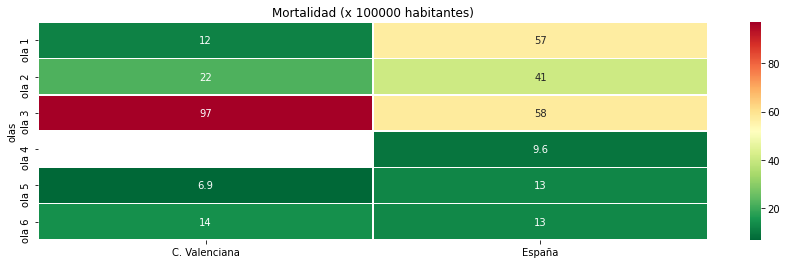

In [21]:
# Mapa de color para la mortalidad en España y C. Valenciana para cada ola
#------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(15,4))   
sns.heatmap(mor, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Mortalidad (x 100000 habitantes)")

Text(0.5, 1.0, 'Letalidad (%)')

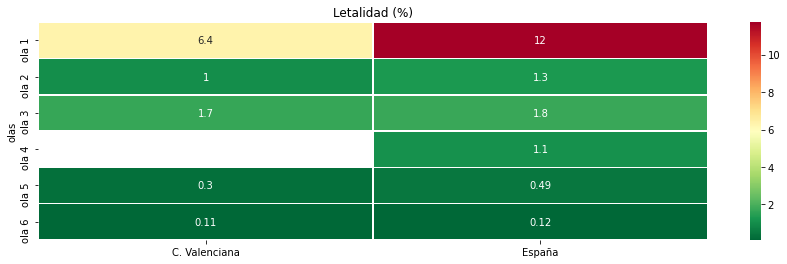

In [22]:
# Mapa de color para la letalidad en España y C. Valenciana para cada ola
#------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(15,4))   
sns.heatmap(let, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Letalidad (%)")

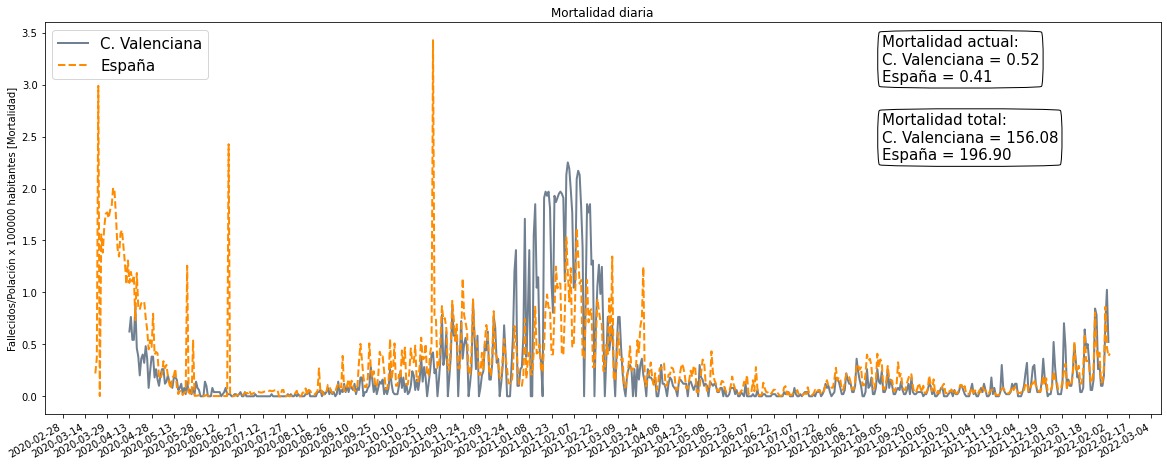

In [23]:
# Gráfica de fallecidos/población por cada 100000 habitantes [mortalidad]
#--------------------------------------------------------------------------
fig,ax = plt.subplots(1,1,figsize=(20,8))
fig.subplots_adjust(hspace=0.08)

# Calculo de la mortalidad para España y la C. Valenciana

temp_ESP=(data_ESP["fallecidos_24h"]*1e5)/p_ESP
data_ESP["mortalidad"]=temp_ESP
temp_CV=(data_CV["fallecidos_24h"]*1e5)/p_CV
data_CV["mortalidad"]=temp_CV

ax.plot(data_CV.index,data_CV["mortalidad"],color=color_CV,linewidth=2,label="C. Valenciana")
ax.plot(data_ESP.index,data_ESP["mortalidad"],color=color_ESP,linewidth=2,label="España",ls="--")

ax.legend(fontsize=15, loc="upper left")

ax.set_ylabel('Fallecidos/Polación x 100000 habitantes [Mortalidad]')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
ax.set_title('Mortalidad diaria')

ax.annotate("Mortalidad actual:\nC. Valenciana = {:.2f}\nEspaña = {:.2f}".format(data_CV["mortalidad"].iloc[-1]
                                                                               ,data_ESP["mortalidad"].iloc[-1])
                  ,xy=(0.75, 0.85), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

mor_tot_ESP=(data_ESP["fallecidos_24h"].sum()*1e5)/p_ESP
mor_tot_CV=(data_CV["fallecidos_24h"].sum()*1e5)/p_CV

ax.annotate("Mortalidad total:\nC. Valenciana = {:.2f}\nEspaña = {:.2f}"
            .format(mor_tot_CV,mor_tot_ESP),xy=(0.75, 0.65),
            xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

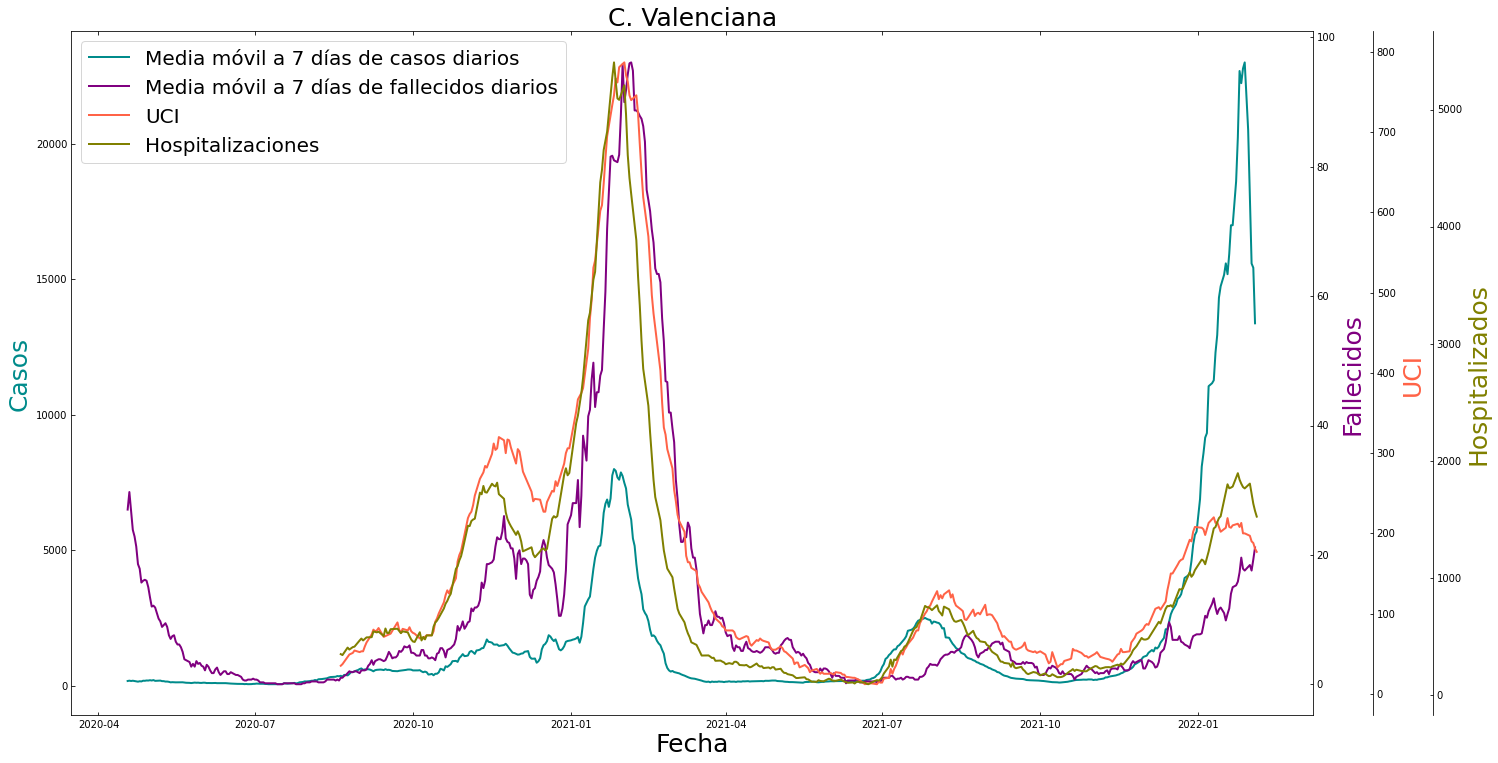

In [24]:
# Gráfica con casos, Fallecidos, UCI y Hospitalizaciones - C. Valenciana
#------------------------------------------------------------------------

ax1 = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=3,top=2.5)

# 1º Eje
ax1.axis["left"].label.set_color(color_casos)
ax1.axis["left"].label.set_fontsize(25)
ax1.axis["bottom"].label.set_fontsize(25)
ax1.set_title("C. Valenciana", fontsize=25)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos")

# 2º Eje
ax2 = ax1.twinx()
new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
ax2.axis["right"] = new_fixed_axis(loc="right",axes=ax2,offset=(0, 0))
ax2.axis["right"].toggle(all=True)
ax2.axis["right"].label.set_color(color_fallecidos)
ax2.axis["right"].label.set_fontsize(25)
ax2.set_ylabel("Fallecidos")

# 3º Eje
ax3 = ax1.twinx()
offset = 60
new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
ax3.axis["right"] = new_fixed_axis(loc="right",axes=ax3,offset=(offset, 0))
ax3.axis["right"].toggle(all=True)
ax3.axis["right"].label.set_color(color_UCI)
ax3.axis["right"].label.set_fontsize(25)
ax3.set_ylabel("UCI")

# 4º Eje
ax4 = ax1.twinx()
offset = 60
new_fixed_axis = ax4.get_grid_helper().new_fixed_axis
ax4.axis["right"] = new_fixed_axis(loc="right",axes=ax4,offset=(offset*2, 0))
ax4.axis["right"].toggle(all=True)
ax4.axis["right"].label.set_color(color_hosp)
ax4.axis["right"].label.set_fontsize(25)
ax4.set_ylabel("Hospitalizados")

# Representaciones
ax1.plot(data_CV_mov_avg.index, data_CV_mov_avg["casos_24h"], c=color_casos,linewidth=2,
            label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
ax2.plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2,
            label="Media móvil a "+ str(days_ajust) + " días de fallecidos diarios")
ax3.plot(data_CV_hosp_UCI.index,data_CV_hosp_UCI["UCI"], c=color_UCI,linewidth=2, label="UCI")
ax4.plot(data_CV_hosp_UCI.index,data_CV_hosp_UCI["hospitalizados"], c=color_hosp,linewidth=2, 
         label="Hospitalizaciones")


ax1.legend(fontsize=20, loc=0)


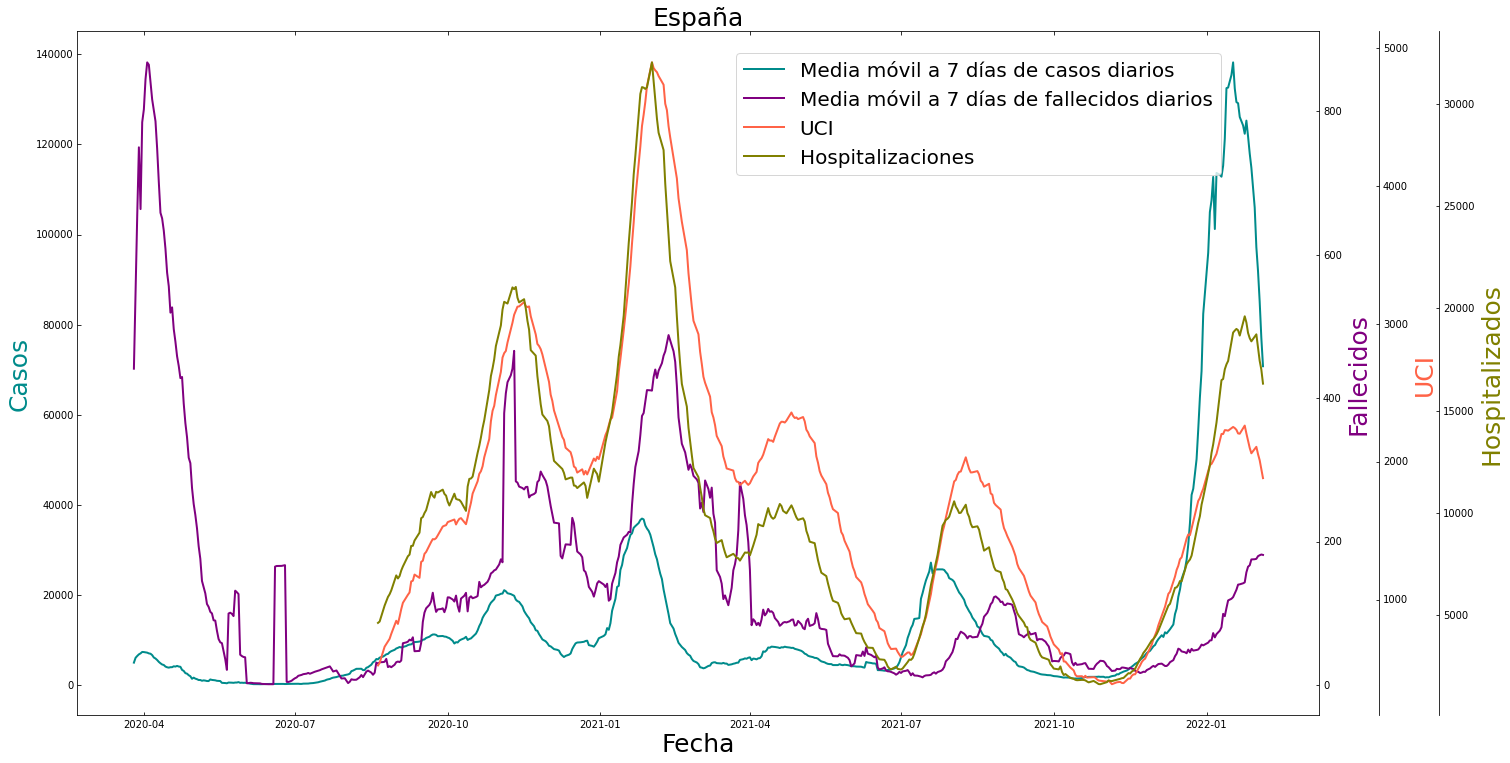

In [25]:
# Gráfica con casos, Fallecidos, UCI y Hospitalizaciones - ESPAÑA
#-------------------------------------------------------------------

ax1 = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=3,top=2.5)

# 1º Eje
ax1.axis["left"].label.set_color(color_casos)
ax1.axis["left"].label.set_fontsize(25)
ax1.axis["bottom"].label.set_fontsize(25)
ax1.set_title("España", fontsize=25)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos")

# 2º Eje
ax2 = ax1.twinx()
new_fixed_axis = ax2.get_grid_helper().new_fixed_axis
ax2.axis["right"] = new_fixed_axis(loc="right",axes=ax2,offset=(0, 0))
ax2.axis["right"].toggle(all=True)
ax2.axis["right"].label.set_color(color_fallecidos)
ax2.axis["right"].label.set_fontsize(25)
ax2.set_ylabel("Fallecidos")

# 3º Eje
ax3 = ax1.twinx()
offset = 60
new_fixed_axis = ax3.get_grid_helper().new_fixed_axis
ax3.axis["right"] = new_fixed_axis(loc="right",axes=ax3,offset=(offset, 0))
ax3.axis["right"].toggle(all=True)
ax3.axis["right"].label.set_color(color_UCI)
ax3.axis["right"].label.set_fontsize(25)
ax3.set_ylabel("UCI")

# 4º Eje
ax4 = ax1.twinx()
offset = 60
new_fixed_axis = ax4.get_grid_helper().new_fixed_axis
ax4.axis["right"] = new_fixed_axis(loc="right",axes=ax4,offset=(offset*2, 0))
ax4.axis["right"].toggle(all=True)
ax4.axis["right"].label.set_color(color_hosp)
ax4.axis["right"].label.set_fontsize(25)
ax4.set_ylabel("Hospitalizados")

# Representaciones
ax1.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["casos_24h"], c=color_casos,linewidth=2,
            label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
ax2.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2,
            label="Media móvil a "+ str(days_ajust) + " días de fallecidos diarios")
ax3.plot(data_ESP_hosp_UCI.index,data_ESP_hosp_UCI["UCI"], c=color_UCI,linewidth=2, label="UCI")
ax4.plot(data_ESP_hosp_UCI.index,data_ESP_hosp_UCI["hospitalizados"], c=color_hosp,linewidth=2, 
         label="Hospitalizaciones")


ax1.legend(fontsize=20, loc=(0.53,0.79),ncol=1,framealpha=0.8)

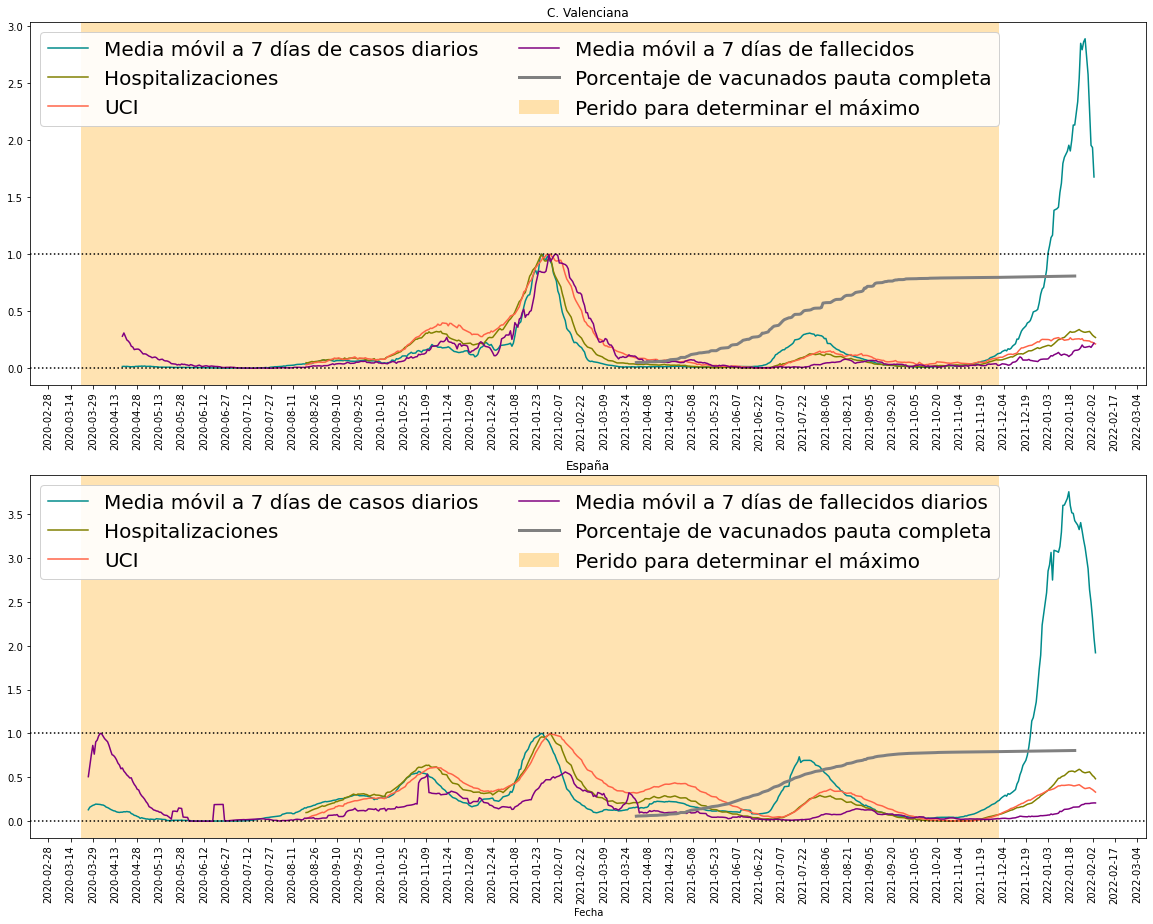

In [26]:
# GRAFICA CON DATOS NORMALIZADOS
# ---------------------------------

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(20,15),sharex=False)
fig.subplots_adjust(hspace=0.25)


axs[0].plot(data_CV_norm.index,data_CV_norm["casos_24h"], c=color_casos,linestyle="-",linewidth=1.5,
            label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
axs[0].plot(data_CV_hosp_UCI_norm.index,data_CV_hosp_UCI_norm["hospitalizados"], c=color_hosp,linestyle="-"
            ,linewidth=1.5,label="Hospitalizaciones")
axs[0].plot(data_CV_hosp_UCI_norm.index,data_CV_hosp_UCI_norm["UCI"], c=color_UCI,linestyle="-",linewidth=1.5
            ,label="UCI")
axs[0].plot(data_CV_norm.index,data_CV_norm["fallecidos_24h"], c=color_fallecidos,linestyle="-",lw=1.5
             ,label="Media móvil a "+ str(days_ajust) + " días de fallecidos")
axs[0].plot(data_por_vac_tot.index,data_por_vac_tot["C. Valenciana - 2 dosis"]/100, c="grey",lw=3
            ,label="Porcentaje de vacunados pauta completa")

axs[0].axhline(y=1, xmin=0, xmax=1,ls="dotted",c=lines)
axs[0].axhline(y=0, xmin=0, xmax=1,ls="dotted",c=lines)

axs[0].axvspan(fecha_ini,fecha_fin, facecolor='orange', alpha=0.3,label="Perido para determinar el máximo")

starty, endy = axs[0].get_ylim()
axs[0].set_ylim((starty,endy))
axs[0].set_title('C. Valenciana')
axs[0].legend(fontsize=20, loc=0,ncol=2,framealpha=0.9)
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[0].tick_params(axis='x', rotation=90)

# ESPAÑA
#------------
axs[1].plot(data_ESP_norm.index,data_ESP_norm["casos_24h"], c=color_casos,linestyle="-",linewidth=1.5,
            label="Media móvil a "+ str(days_ajust) + " días de casos diarios")
axs[1].plot(data_ESP_hosp_UCI_norm.index,data_ESP_hosp_UCI_norm["hospitalizados"], c=color_hosp,linestyle="-"
            ,linewidth=1.5,label="Hospitalizaciones")
axs[1].plot(data_ESP_hosp_UCI_norm.index,data_ESP_hosp_UCI_norm["UCI"], c=color_UCI,ls="-",lw=1.5
            ,label="UCI")
axs[1].plot(data_ESP_norm.index,data_ESP_norm["fallecidos_24h"], c=color_fallecidos, ls="-",lw=1.5
            ,label="Media móvil a "+ str(days_ajust) + " días de fallecidos diarios")
axs[1].plot(data_por_vac_tot.index,data_por_vac_tot["España - 2 dosis"]/100, c="grey",lw=3
            ,label="Porcentaje de vacunados pauta completa")

axs[1].axhline(y=1, xmin=0, xmax=1,ls="dotted",c=lines)
axs[1].axhline(y=0, xmin=0, xmax=1,ls="dotted",c=lines)

axs[1].axvspan(fecha_ini,fecha_fin, facecolor='orange', alpha=0.3,label="Perido para determinar el máximo")

starty, endy = axs[1].get_ylim()
axs[1].set_ylim((starty,endy))
axs[1].set_title('España')
axs[1].set_xlabel("Fecha")
axs[1].legend(fontsize=20, loc=0,ncol=2,framealpha=0.9)

axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
axs[1].tick_params(axis='x', rotation=90)

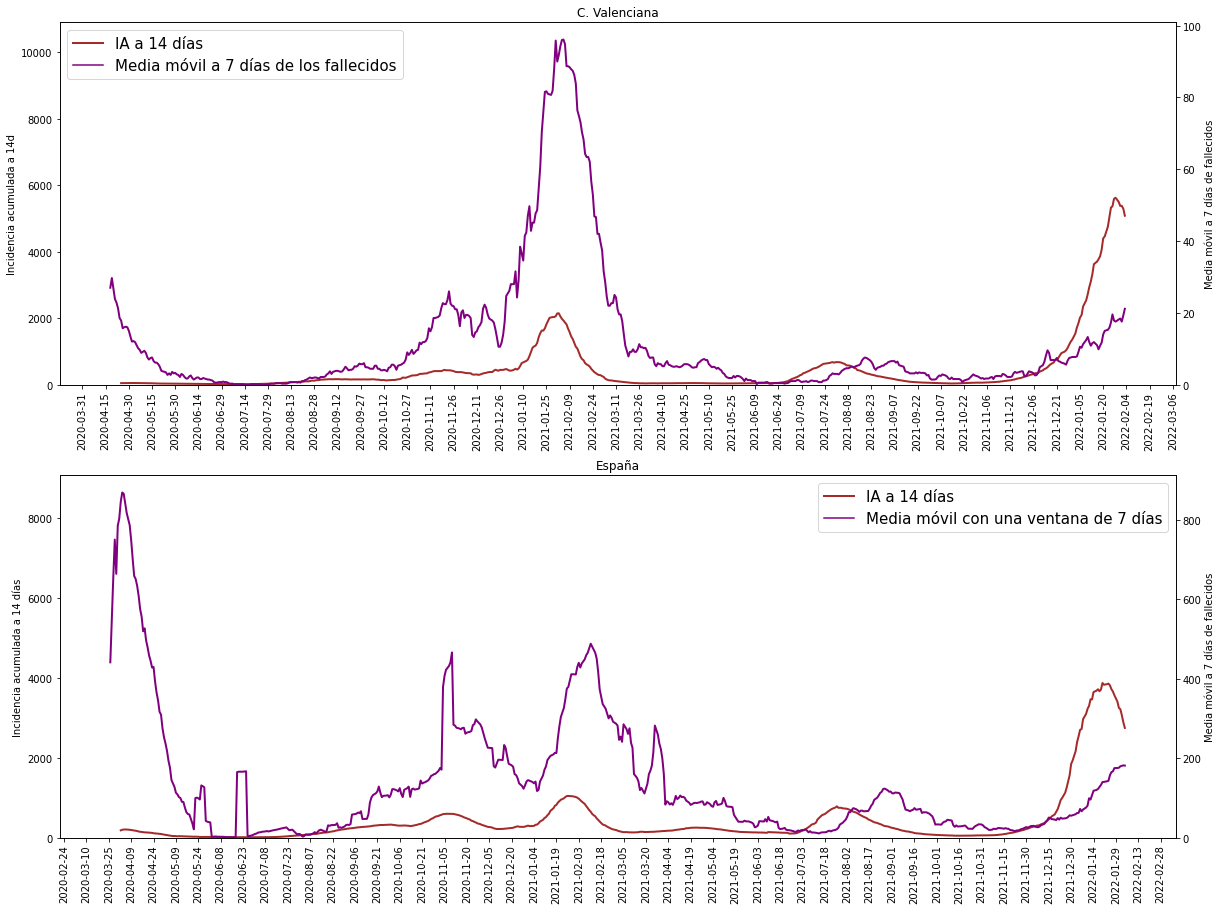

In [27]:
# Gráfica de IA 14d comparado con tendencia de fallecidos
#----------------------------------------------------------

fig, (ax11,ax12) = plt.subplots(2,1,figsize=(20,15))
fig.subplots_adjust(hspace=0.25)

ax21=ax11.twinx()
ax22=ax12.twinx()

# C. Valenciana
ax11.plot(data_CV.index, data_CV["IA_14d"],color=color_IA14d,linewidth=2,label="IA a 14 días")
ax11.plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"]*0-100000,c=color_fallecidos,
          label="Media móvil a "+ str(days_ajust) + " días de los fallecidos") # Solo para la leyenda
ax21.plot(data_CV_mov_avg.index, data_CV_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2)

ax11.legend(fontsize=15, loc="upper left")

ax11.set_ylabel('Incidencia acumulada a 14d')
ax21.set_ylabel("Media móvil a "+ str(days_ajust) + " días de fallecidos")
starty11, endy11 = ax11.get_ylim()
ax11.set_ylim((0,endy11))
starty21, endy21 = ax21.get_ylim()
ax21.set_ylim((0,endy21))
ax11.set_title('C. Valenciana')
ax11.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax11.tick_params(axis='x', rotation=90)


# España
ax12.plot(data_ESP.index, data_ESP["IA_14d"],color=color_IA14d,linewidth=2,label="IA a 14 días")
ax12.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"]*0-100000,c=color_fallecidos,
          label="Media móvil con una ventana de "+ str(days_ajust) + " días") # Solo para la leyenda
ax22.plot(data_ESP_mov_avg.index, data_ESP_mov_avg["fallecidos_24h"], c=color_fallecidos,linewidth=2)

ax12.legend(fontsize=15, loc="upper right")

ax12.set_ylabel('Incidencia acumulada a 14 días')
ax22.set_ylabel("Media móvil a "+ str(days_ajust) + " días de fallecidos")
starty12, endy12 = ax12.get_ylim()
ax12.set_ylim((0,endy12))
starty22, endy22 = ax22.get_ylim()
ax22.set_ylim((0,endy22))
ax12.set_title('España')
ax12.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax12.tick_params(axis='x', rotation=90)

## Gráficas en detalle edad/sexo de la C. Valenciana

#### Datos disgregados por rango de edad

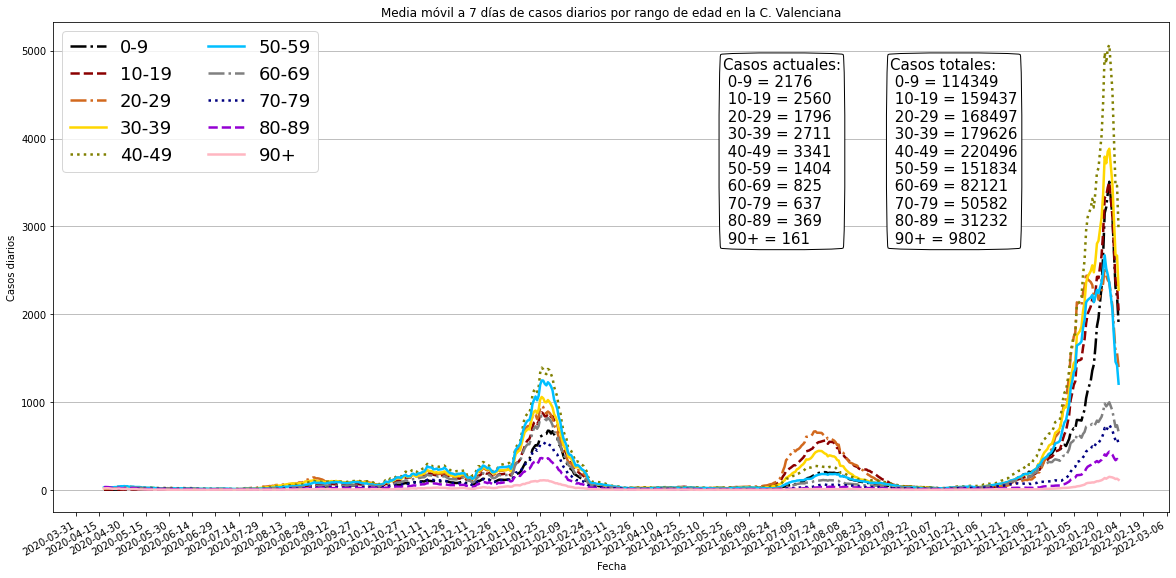

In [28]:
# Gráfica média móvil casos diarios disgregados por rango de edad
#----------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]


for i in list(range(10)):
    ax.plot(data_CV_casos_edad_mov_avg.index,data_CV_casos_edad_mov_avg[a[i]],color=color_edad[i],label=a[i]
            ,linewidth=2.5,ls=line_style_edad[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("Casos actuales:\n 0-9 = {:.0f}\n 10-19 = {:.0f}\n 20-29 = {:.0f}\n 30-39 = {:.0f}\n 40-49 = {:.0f}\n 50-59 = {:.0f}\n 60-69 = {:.0f}\n 70-79 = {:.0f}\n 80-89 = {:.0f}\n 90+ = {:.0f}"
            .format(data_CV_casos_edad["0-9"].iloc[-1],data_CV_casos_edad["10-19"].iloc[-1],
                    data_CV_casos_edad["20-29"].iloc[-1],data_CV_casos_edad["30-39"].iloc[-1],
                    data_CV_casos_edad["40-49"].iloc[-1],data_CV_casos_edad["50-59"].iloc[-1],
                    data_CV_casos_edad["60-69"].iloc[-1],data_CV_casos_edad["70-79"].iloc[-1],
                    data_CV_casos_edad["80-89"].iloc[-1],data_CV_casos_edad["90+"].iloc[-1]),
            xy=(0.60, 0.55),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

ax.annotate("Casos totales:\n 0-9 = {:.0f}\n 10-19 = {:.0f}\n 20-29 = {:.0f}\n 30-39 = {:.0f}\n 40-49 = {:.0f}\n 50-59 = {:.0f}\n 60-69 = {:.0f}\n 70-79 = {:.0f}\n 80-89 = {:.0f}\n 90+ = {:.0f}"
            .format(data_CV_casos_edad["0-9"].sum(),data_CV_casos_edad["10-19"].sum(),
                    data_CV_casos_edad["20-29"].sum(),data_CV_casos_edad["30-39"].sum(),
                    data_CV_casos_edad["40-49"].sum(),data_CV_casos_edad["50-59"].sum(),
                    data_CV_casos_edad["60-69"].sum(),data_CV_casos_edad["70-79"].sum(),
                    data_CV_casos_edad["80-89"].sum(),data_CV_casos_edad["90+"].sum()),
            xy=(0.75, 0.55),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax.set_title("Media móvil a "+ str(days_ajust) + " días de casos diarios por rango de edad en la C. Valenciana")
ax.set_ylabel('Casos diarios')
ax.set_xlabel('Fecha')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
# ax.yaxis.set_ticks(np.arange(starty, endy, 200))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

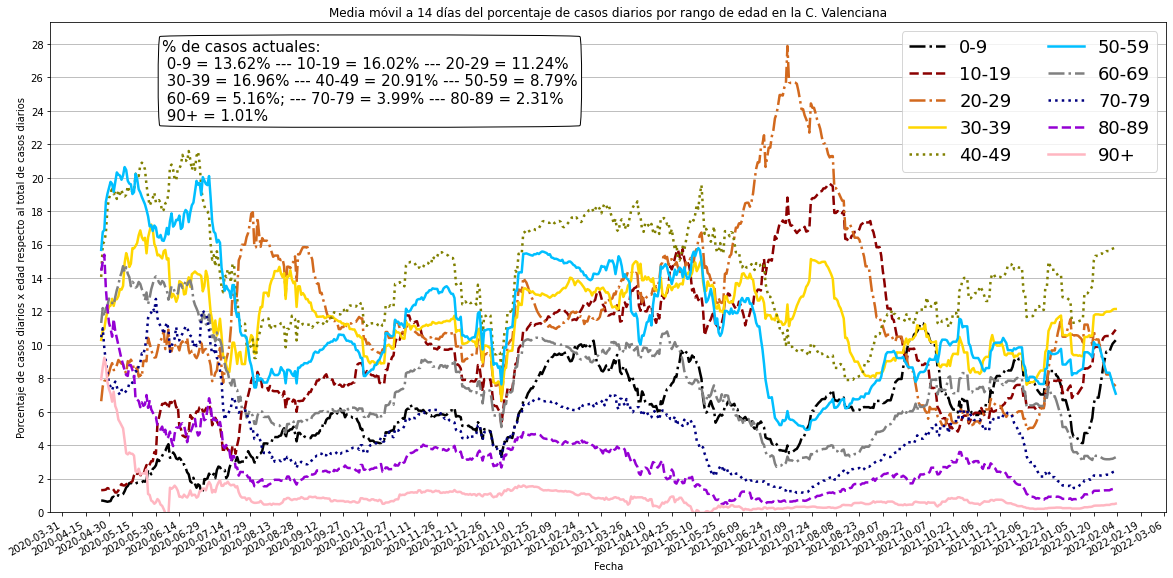

In [29]:
# Gráfica média móvil de porcentaje casos diarios disgregados por rango de edad
#------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]


for i in list(range(10)):
    ax.plot(data_CV_por_casos_edad_mov_avg.index,data_CV_por_casos_edad_mov_avg[a[i]],color=color_edad[i],label=a[i]
            ,linewidth=2.5,ls=line_style_edad[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("% de casos actuales:\n 0-9 = {:.2f}% --- 10-19 = {:.2f}% --- 20-29 = {:.2f}%\n 30-39 = {:.2f}% --- 40-49 = {:.2f}% --- 50-59 = {:.2f}%\n 60-69 = {:.2f}%; --- 70-79 = {:.2f}% --- 80-89 = {:.2f}%\n 90+ = {:.2f}%"
            .format(data_CV_por_casos_edad["0-9"].iloc[-1],data_CV_por_casos_edad["10-19"].iloc[-1],
                    data_CV_por_casos_edad["20-29"].iloc[-1],data_CV_por_casos_edad["30-39"].iloc[-1],
                    data_CV_por_casos_edad["40-49"].iloc[-1],data_CV_por_casos_edad["50-59"].iloc[-1],
                    data_CV_por_casos_edad["60-69"].iloc[-1],data_CV_por_casos_edad["70-79"].iloc[-1],
                    data_CV_por_casos_edad["80-89"].iloc[-1],data_CV_por_casos_edad["90+"].iloc[-1]),
            xy=(0.10, 0.80),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax.set_title("Media móvil a "+ str(days_ajust2) + 
             " días del porcentaje de casos diarios por rango de edad en la C. Valenciana")
ax.set_ylabel('Porcentaje de casos diarios x edad respecto al total de casos diarios')
ax.set_xlabel('Fecha')

starty, endy = ax.get_ylim()
ax.set_ylim((0,endy))
ax.yaxis.set_ticks(np.arange(0, endy, 2))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))


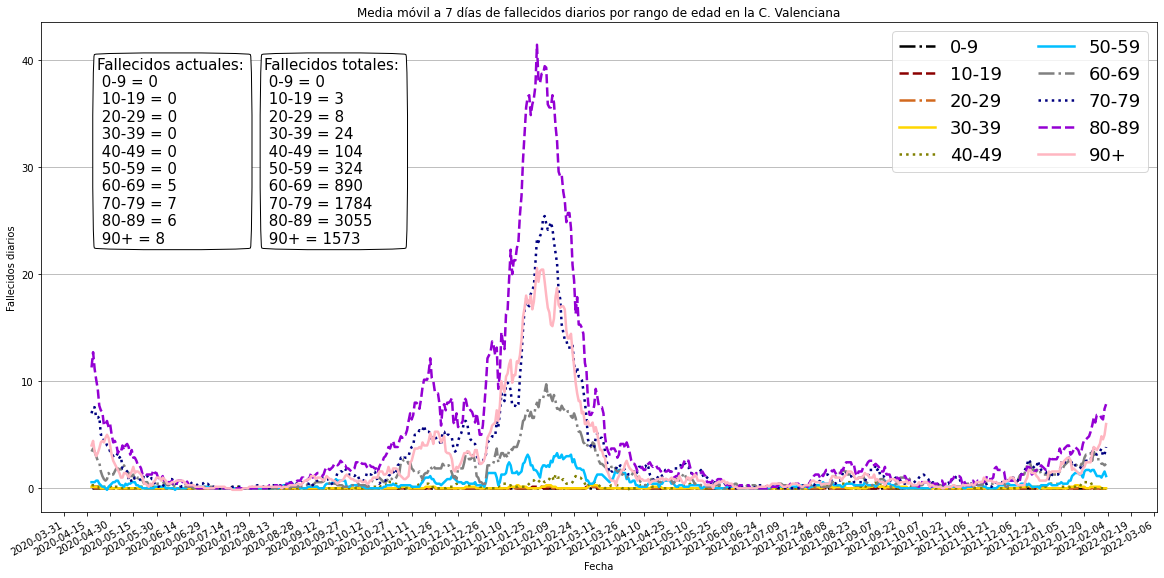

In [30]:
# Gráfica medía móvil fallecidos disgregados por rango de edad
#-------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

for i in list(range(10)):
    ax.plot(data_CV_fallecidos_edad_mov_avg.index,data_CV_fallecidos_edad_mov_avg[a[i]],color=color_edad[i]
            ,label=a[i],linewidth=2.5,ls=line_style_edad[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("Fallecidos actuales: \n 0-9 = {:.0f}\n 10-19 = {:.0f}\n 20-29 = {:.0f}\n 30-39 = {:.0f}\n 40-49 = {:.0f}\n 50-59 = {:.0f}\n 60-69 = {:.0f}\n 70-79 = {:.0f}\n 80-89 = {:.0f}\n 90+ = {:.0f}"
            .format(data_CV_fallecidos_edad["0-9"].iloc[-1],data_CV_fallecidos_edad["10-19"].iloc[-1],
                    data_CV_fallecidos_edad["20-29"].iloc[-1],data_CV_fallecidos_edad["30-39"].iloc[-1],
                    data_CV_fallecidos_edad["40-49"].iloc[-1],data_CV_fallecidos_edad["50-59"].iloc[-1],
                    data_CV_fallecidos_edad["60-69"].iloc[-1],data_CV_fallecidos_edad["70-79"].iloc[-1],
                    data_CV_fallecidos_edad["80-89"].iloc[-1],data_CV_fallecidos_edad["90+"].iloc[-1]),
            xy=(0.05, 0.55),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

ax.annotate("Fallecidos totales: \n 0-9 = {:.0f}\n 10-19 = {:.0f}\n 20-29 = {:.0f}\n 30-39 = {:.0f}\n 40-49 = {:.0f}\n 50-59 = {:.0f}\n 60-69 = {:.0f}\n 70-79 = {:.0f}\n 80-89 = {:.0f}\n 90+ = {:.0f}"
            .format(data_CV_fallecidos_edad["0-9"].sum(),data_CV_fallecidos_edad["10-19"].sum(),
                    data_CV_fallecidos_edad["20-29"].sum(),data_CV_fallecidos_edad["30-39"].sum(),
                    data_CV_fallecidos_edad["40-49"].sum(),data_CV_fallecidos_edad["50-59"].sum(),
                    data_CV_fallecidos_edad["60-69"].sum(),data_CV_fallecidos_edad["70-79"].sum(),
                    data_CV_fallecidos_edad["80-89"].sum(),data_CV_fallecidos_edad["90+"].sum()),
            xy=(0.20, 0.55),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax.set_title("Media móvil a "+ str(days_ajust) + " días de fallecidos diarios por rango de edad en la C. Valenciana")
ax.set_ylabel('Fallecidos diarios')
ax.set_xlabel('Fecha')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
# ax.yaxis.set_ticks(np.arange(starty, endy, 200))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

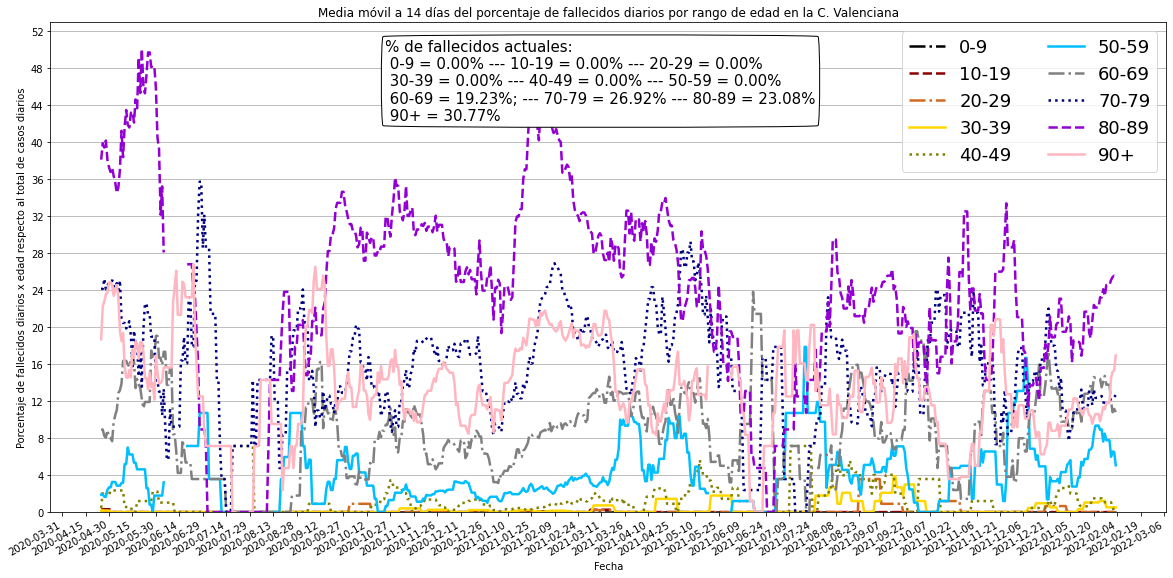

In [31]:
# Gráfica média móvil de porcentaje fallecidos diarios disgregados por rango de edad
#------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]


for i in list(range(10)):
    ax.plot(data_CV_por_fallecidos_edad_mov_avg.index,data_CV_por_fallecidos_edad_mov_avg[a[i]],color=color_edad[i],label=a[i]
            ,linewidth=2.5,ls=line_style_edad[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("% de fallecidos actuales:\n 0-9 = {:.2f}% --- 10-19 = {:.2f}% --- 20-29 = {:.2f}%\n 30-39 = {:.2f}% --- 40-49 = {:.2f}% --- 50-59 = {:.2f}%\n 60-69 = {:.2f}%; --- 70-79 = {:.2f}% --- 80-89 = {:.2f}%\n 90+ = {:.2f}%"
            .format(data_CV_por_fallecidos_edad["0-9"].iloc[-1],data_CV_por_fallecidos_edad["10-19"].iloc[-1],
                    data_CV_por_fallecidos_edad["20-29"].iloc[-1],data_CV_por_fallecidos_edad["30-39"].iloc[-1],
                    data_CV_por_fallecidos_edad["40-49"].iloc[-1],data_CV_por_fallecidos_edad["50-59"].iloc[-1],
                    data_CV_por_fallecidos_edad["60-69"].iloc[-1],data_CV_por_fallecidos_edad["70-79"].iloc[-1],
                    data_CV_por_fallecidos_edad["80-89"].iloc[-1],data_CV_por_fallecidos_edad["90+"].iloc[-1]),
            xy=(0.30, 0.80),xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

# Ponemos etiquetas y configuramos los ejes
ax.set_title("Media móvil a "+ str(days_ajust2) + 
             " días del porcentaje de fallecidos diarios por rango de edad en la C. Valenciana")
ax.set_ylabel('Porcentaje de fallecidos diarios x edad respecto al total de casos diarios')
ax.set_xlabel('Fecha')

starty, endy = ax.get_ylim()
ax.set_ylim((0,endy))
ax.yaxis.set_ticks(np.arange(0, endy, 4))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))


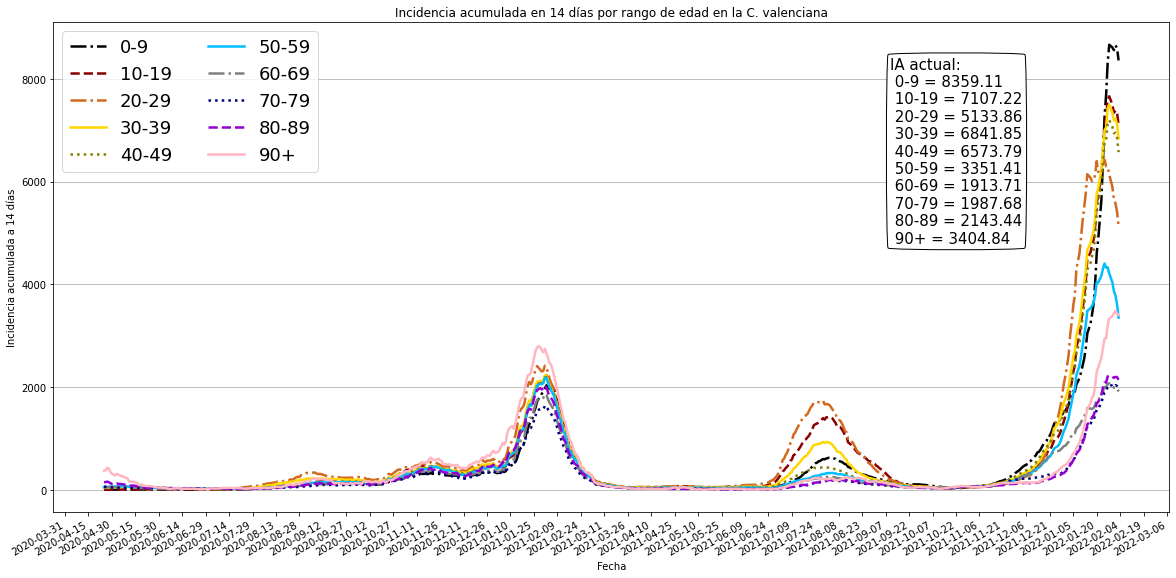

In [32]:
# Gráfica medía móvil fallecidos disgregados por rango de edad
#-------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

for i in list(range(10)):
    ax.plot(data_CV_IA_14d_edad.index,data_CV_IA_14d_edad[a[i]],color=color_edad[i]
            ,label=a[i],linewidth=2.5,ls=line_style_edad[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("IA actual:\n 0-9 = {:.2f}\n 10-19 = {:.2f}\n 20-29 = {:.2f}\n 30-39 = {:.2f}\n 40-49 = {:.2f}\n 50-59 = {:.2f}\n 60-69 = {:.2f}\n 70-79 = {:.2f}\n 80-89 = {:.2f}\n 90+ = {:.2f}"
            .format(data_CV_IA_14d_edad["0-9"].iloc[-1],data_CV_IA_14d_edad["10-19"].iloc[-1],
                    data_CV_IA_14d_edad["20-29"].iloc[-1],data_CV_IA_14d_edad["30-39"].iloc[-1],
                    data_CV_IA_14d_edad["40-49"].iloc[-1],data_CV_IA_14d_edad["50-59"].iloc[-1],
                    data_CV_IA_14d_edad["60-69"].iloc[-1],data_CV_IA_14d_edad["70-79"].iloc[-1],
                    data_CV_IA_14d_edad["80-89"].iloc[-1],data_CV_IA_14d_edad["90+"].iloc[-1]),xy=(0.75, 0.55),
            xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax.set_title("Incidencia acumulada en 14 días por rango de edad en la C. valenciana")
ax.set_ylabel('Incidencia acumulada a 14 días')
ax.set_xlabel('Fecha')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
# ax.yaxis.set_ticks(np.arange(starty, endy, 200))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

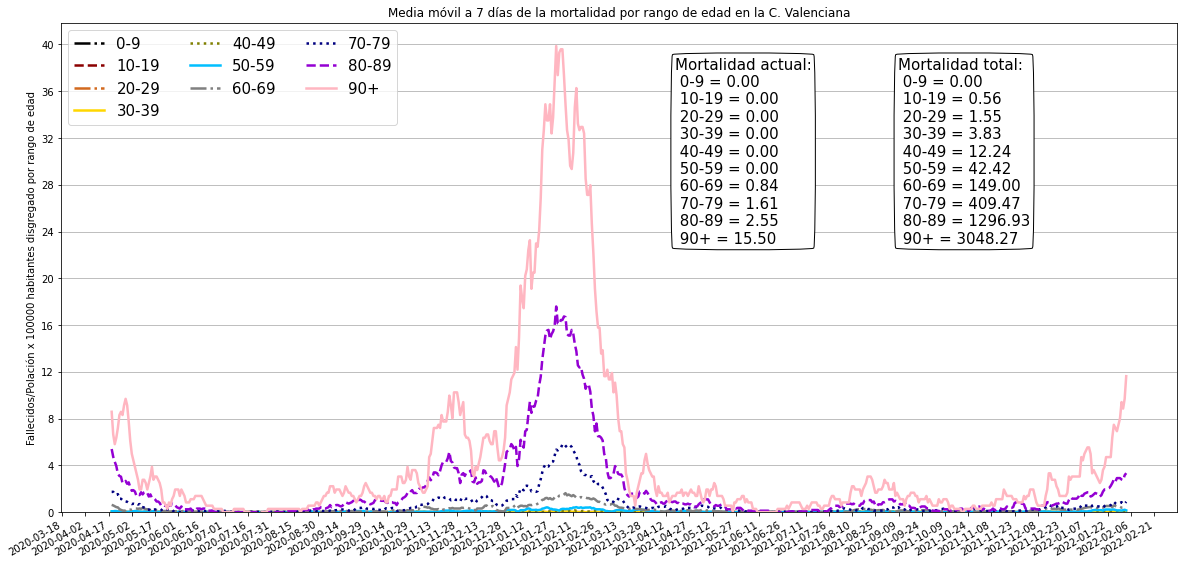

In [33]:
# Gráfica de fallecidos/población por cada 100000 habitantes disgregado por rango de edad [mortalidad]
#-----------------------------------------------------------------------------------------------------
fig,ax = plt.subplots(1,1,figsize=(20,10))
fig.subplots_adjust(hspace=0.08)

a=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]
p_CV_edad=[441303,540113,516278,627111,849342,763828,597320,435684,235556,51603]

# Calculo de la mortalidad diaria 
mor_CV_edad=data_CV_fallecidos_edad.copy()
for i in list(range(len(a))):
    mor_CV_edad[a[i]]=(data_CV_fallecidos_edad[a[i]]*1e5)/p_CV_edad[i]

# Calculo de la mortalidad total
mor_CV_edad_total=[None]*len(a)
for i in list(range(len(a))):
    mor_CV_edad_total[i]=(data_CV_fallecidos_edad[a[i]].sum()*1e5)/p_CV_edad[i]


# Calculamos la media móvil
mor_CV_edad_temp=mor_CV_edad.fillna(0)
mor_CV_edad_mov_avg=mor_CV_edad.rolling(days_ajust).mean()

for i in list(range(10)):
    ax.plot(mor_CV_edad_mov_avg.index,mor_CV_edad_mov_avg[a[i]],color=color_edad[i],label=a[i]
            ,linewidth=2.5,ls=line_style_edad[i])
    
ax.legend(fontsize=15,ncol=3, loc="upper left")

ax.set_ylabel('Fallecidos/Polación x 100000 habitantes disgregado por rango de edad')
starty, endy = ax.get_ylim()
ax.set_ylim((0,endy))
ax.yaxis.set_ticks(np.arange(0, endy, 4))
ax.yaxis.grid()
ax.set_title("Media móvil a "+ str(days_ajust) + " días de la mortalidad por rango de edad en la C. Valenciana")

ax.annotate("Mortalidad actual:\n 0-9 = {:.2f}\n 10-19 = {:.2f}\n 20-29 = {:.2f}\n 30-39 = {:.2f}\n 40-49 = {:.2f}\n 50-59 = {:.2f}\n 60-69 = {:.2f}\n 70-79 = {:.2f}\n 80-89 = {:.2f}\n 90+ = {:.2f}"
            .format(mor_CV_edad["0-9"][-1],mor_CV_edad["10-19"][-1],mor_CV_edad["20-29"][-1],
                    mor_CV_edad["30-39"][-1],mor_CV_edad["40-49"][-1],mor_CV_edad["50-59"][-1],
                    mor_CV_edad["60-69"][-1],mor_CV_edad["70-79"][-1],mor_CV_edad["80-89"][-1],
                    mor_CV_edad["90+"][-1]),xy=(0.55, 0.55),
            xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

ax.annotate("Mortalidad total:\n 0-9 = {:.2f}\n 10-19 = {:.2f}\n 20-29 = {:.2f}\n 30-39 = {:.2f}\n 40-49 = {:.2f}\n 50-59 = {:.2f}\n 60-69 = {:.2f}\n 70-79 = {:.2f}\n 80-89 = {:.2f}\n 90+ = {:.2f}"
            .format(mor_CV_edad_total[0],mor_CV_edad_total[1],mor_CV_edad_total[2],
                   mor_CV_edad_total[3],mor_CV_edad_total[4],mor_CV_edad_total[5],
                   mor_CV_edad_total[6],mor_CV_edad_total[7],mor_CV_edad_total[8],
                   mor_CV_edad_total[9]),xy=(0.75, 0.55),
            xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

Text(0.5, 1.0, 'Mortalidad (x100000) por rango de edad de la C. Valenciana')

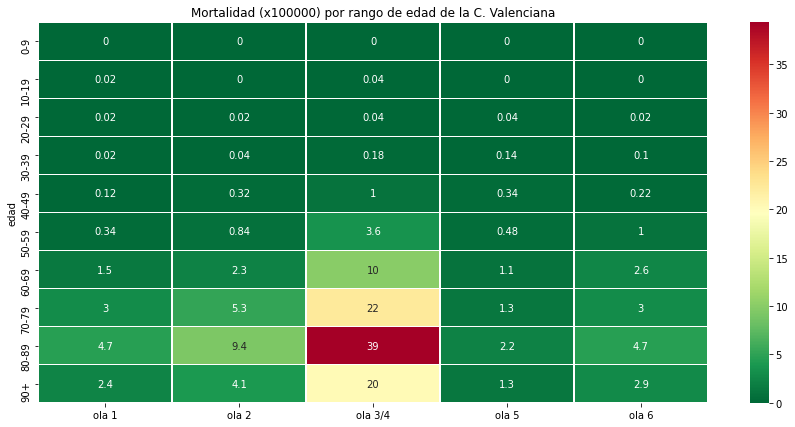

In [34]:
# Mapa de calor de la mortalidad disgregado por rango de edad para cada ola
#-------------------------------------------------------------------------------------------------------------

# Creamos el Dataframe donde vamos a guardar los datos
data=[["0-9"],["10-19"],["20-29"],["30-39"],["40-49"],["50-59"],["60-69"],["70-79"],["80-89"],["90+"]]
mor_edad=pd.DataFrame(data,columns=["edad"])

# Creamos la tabla
edad=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]
name_olas=["ola 1","ola 2","ola 3/4","ola 5", "ola 6"]

for j in range(len(olas_CV)):
    temp=[None]*len(edad)
    for i in range(len(edad)):
        temp[i]=(data_CV_fallecidos_edad[olas_CV[j][0]:olas_CV[j][1]][edad[i]].sum())*1e5/p_CV
    mor_edad[name_olas[j]]=temp

mor_edad=mor_edad.set_index("edad")

fig, ax = plt.subplots(figsize=(15,7))   
sns.heatmap(mor_edad, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Mortalidad (x100000) por rango de edad de la C. Valenciana")

Text(0.5, 1.0, 'Letalidad (%) por rango de edad de la C. Valenciana')

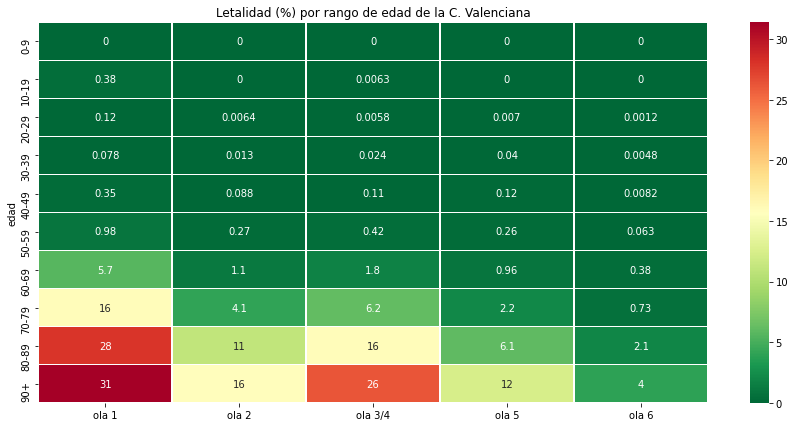

In [35]:
# Mapa de calor de la letalidad disgregado por rango de edad para cada ola
#-------------------------------------------------------------------------------------------------------------

# Creamos el Dataframe donde vamos a guardar los datos
data=[["0-9"],["10-19"],["20-29"],["30-39"],["40-49"],["50-59"],["60-69"],["70-79"],["80-89"],["90+"]]
let_edad=pd.DataFrame(data,columns=["edad"])

# Creamos la tabla
olas_CV=[(data_CV_fallecidos_edad.index[0],"2020-07-01"),("2020-08-01","2020-12-12"),("2020-12-15","2021-06-01"),
     ("2021-06-15","2021-10-01"),("2021-12-01",data_CV_fallecidos_edad.index[-1])]
edad=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]
name_olas=["ola 1","ola 2","ola 3/4","ola 5", "ola 6"]

for j in range(len(olas_CV)):
    temp=[None]*len(edad)
    for i in range(len(edad)):
        temp[i]=(data_CV_fallecidos_edad[olas_CV[j][0]:olas_CV[j][1]][edad[i]].sum()
                 /data_CV_casos_edad[olas_CV[j][0]:olas_CV[j][1]][edad[i]].sum())*100
    let_edad[name_olas[j]]=temp

let_edad=let_edad.set_index("edad")

fig, ax = plt.subplots(figsize=(15,7))   
sns.heatmap(let_edad, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Letalidad (%) por rango de edad de la C. Valenciana")

#### Datos disgregados por sexo

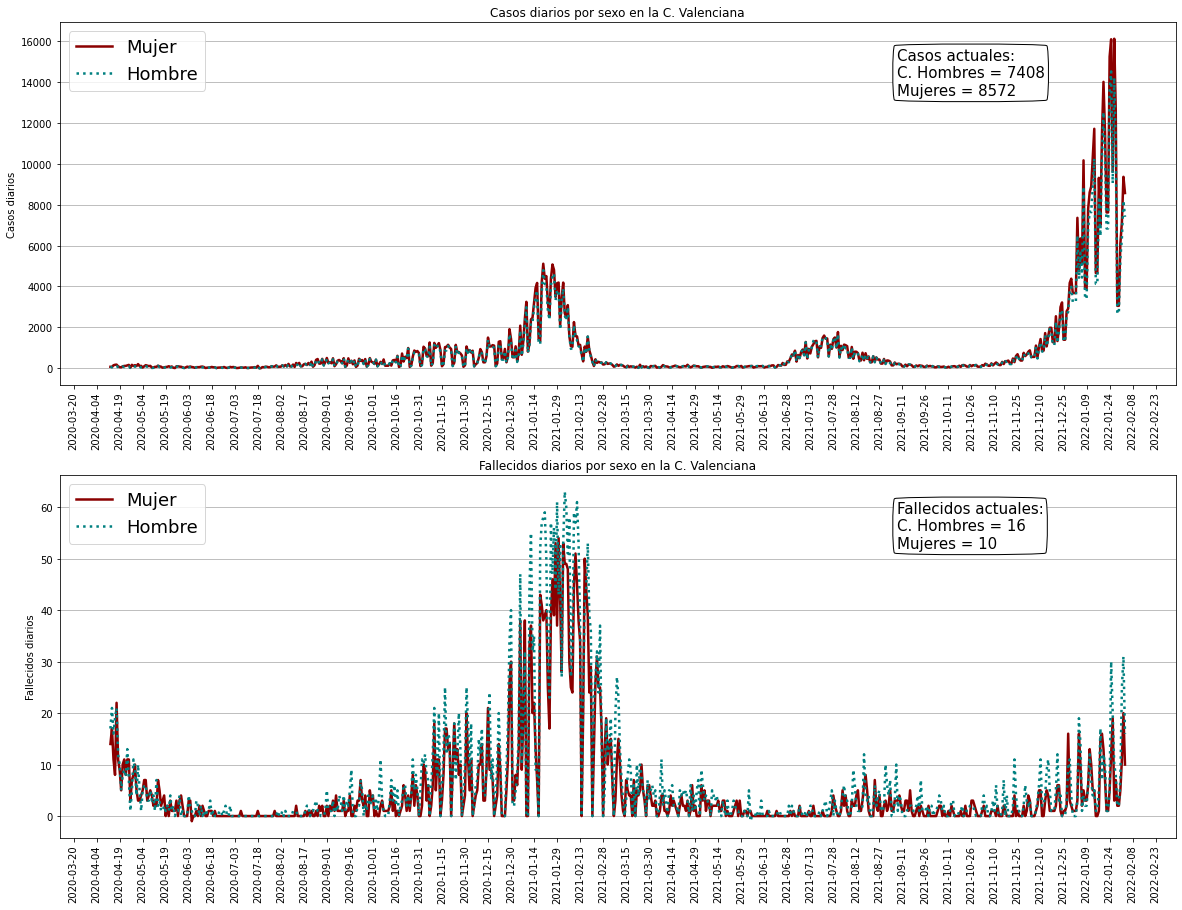

In [36]:
# Gráfica casos/fallecidos diarios disgregados en sexo
#------------------------------------------------------

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,15))
fig.subplots_adjust(hspace=0.25)

a_casos=["casos_24h_mujer","casos_24h_hombre"]
a_fallecidos=["fallecidos_24h_mujer","fallecidos_24h_hombre"]
l=["Mujer","Hombre"]

for i in list(range(2)):
    ax1.plot(data_CV_hombre_mujer.index,data_CV_hombre_mujer[a_casos[i]],color=color_sexo[i],label=l[i],
            lw=2.5,ls=line_style_sexo[i])

ax1.legend(ncol=1,fontsize=18, loc="upper left")

ax1.annotate("Casos actuales:\nC. Hombres = {:.0f}\nMujeres = {:.0f}".format
            (data_CV_hombre_mujer["casos_24h_hombre"].iloc[-1],data_CV_hombre_mujer["casos_24h_mujer"].iloc[-1])
            ,xy=(0.75, 0.80), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax1.set_title("Casos diarios por sexo en la C. Valenciana")
ax1.set_ylabel('Casos diarios')
starty1, endy1 = ax1.get_ylim()
ax1.set_ylim((starty1,endy1))
ax1.yaxis.grid()
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax1.tick_params(axis='x', rotation=90)

for i in list(range(2)):
    ax2.plot(data_CV_hombre_mujer.index,data_CV_hombre_mujer[a_fallecidos[i]],color=color_sexo[i],label=l[i],
            lw=2.5,ls=line_style_sexo[i])

ax2.legend(ncol=1,fontsize=18, loc="upper left")

ax2.annotate("Fallecidos actuales:\nC. Hombres = {:.0f}\nMujeres = {:.0f}".format
            (data_CV_hombre_mujer["fallecidos_24h_hombre"].iloc[-1],data_CV_hombre_mujer["fallecidos_24h_mujer"].iloc[-1])
            ,xy=(0.75, 0.80), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax2.set_title("Fallecidos diarios por sexo en la C. Valenciana")
ax2.set_ylabel('Fallecidos diarios')
starty2, endy2 = ax2.get_ylim()
ax2.set_ylim((starty2,endy2))
ax2.yaxis.grid()
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))
ax2.tick_params(axis='x', rotation=90)

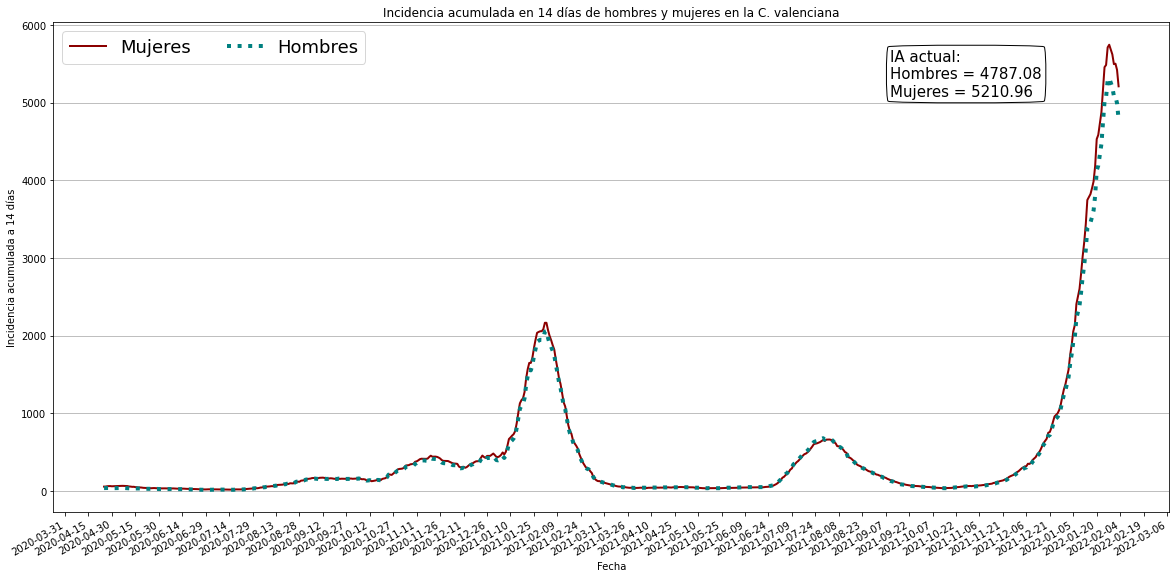

In [37]:
# Gráfica de la IA a 14 días disgregados por sexo
#-------------------------------------------------------------

fig, ax = plt.subplots(figsize=(20,10))
a=["IA_14d_mujer","IA_14d_hombre"]
b=["Mujeres","Hombres"]
l=[2,4]

for i in list(range(len(a))):
    ax.plot(data_CV_IA_14d_sexo.index,data_CV_IA_14d_sexo[a[i]],color=color_sexo[i]
            ,label=b[i],linewidth=l[i],ls=line_style_sexo[i])
ax.legend(ncol=2,fontsize=18)

ax.annotate("IA actual:\nHombres = {:.2f}\nMujeres = {:.2f}".format
            (data_CV_IA_14d_sexo["IA_14d_hombre"].iloc[-1],data_CV_IA_14d_sexo["IA_14d_mujer"].iloc[-1])
            ,xy=(0.75, 0.85), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)


# Ponemos etiquetas y configuramos los ejes
ax.set_title("Incidencia acumulada en 14 días de hombres y mujeres en la C. valenciana")
ax.set_ylabel('Incidencia acumulada a 14 días')
ax.set_xlabel('Fecha')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
ax.yaxis.grid()
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

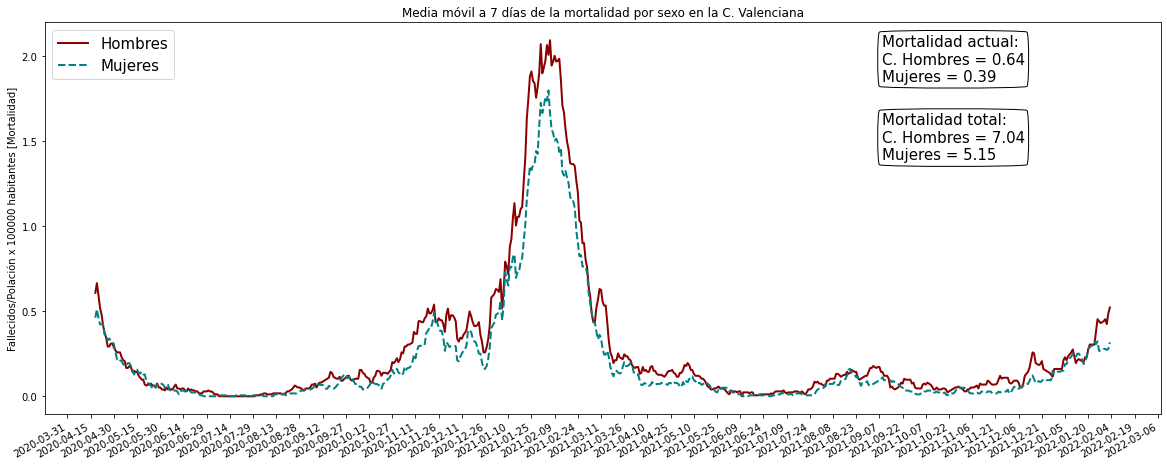

In [38]:
# Gráfica de fallecidos/población por cada 100000 habitantes disgregado por sexo [mortalidad]
#----------------------------------------------------------------------------------------------
fig,ax = plt.subplots(1,1,figsize=(20,8))
fig.subplots_adjust(hspace=0.08)

# Calculo de la mortalidad para España y la C. Valenciana
p_hombre=2491394
p_mujer=2566744

temp_hombre=(data_CV_hombre_mujer["fallecidos_24h_hombre"]*1e5)/p_hombre
data_CV_hombre_mujer["mortalidad_hombre"]=temp_hombre


temp_mujer=(data_CV_hombre_mujer["fallecidos_24h_mujer"]*1e5)/p_mujer
data_CV_hombre_mujer["mortalidad_mujer"]=temp_mujer

data_hombre_mujer_temp=data_CV_hombre_mujer.fillna(0)
data_hombre_mujer_mov_avg=data_hombre_mujer_temp.rolling(days_ajust).mean()


ax.plot(data_hombre_mujer_mov_avg.index,data_hombre_mujer_mov_avg["mortalidad_hombre"],color=color_sexo[0],linewidth=2,
        label="Hombres")
ax.plot(data_hombre_mujer_mov_avg.index,data_hombre_mujer_mov_avg["mortalidad_mujer"],color=color_sexo[1],linewidth=2,
        label="Mujeres",ls="--")

ax.legend(fontsize=15, loc="upper left")

ax.set_ylabel('Fallecidos/Polación x 100000 habitantes [Mortalidad]')
starty, endy = ax.get_ylim()
ax.set_ylim((starty,endy))
ax.set_title("Media móvil a "+ str(days_ajust) + " días de la mortalidad por sexo en la C. Valenciana")

ax.annotate("Mortalidad actual:\nC. Hombres = {:.2f}\nMujeres = {:.2f}".format
            (data_CV_hombre_mujer["mortalidad_hombre"].iloc[-1],data_CV_hombre_mujer["mortalidad_mujer"].iloc[-1])
            ,xy=(0.75, 0.85), xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

mor_tot_hombre=(data_CV_hombre_mujer["mortalidad_hombre"].sum()*1e5)/p_hombre
mor_tot_mujer=(data_CV_hombre_mujer["mortalidad_mujer"].sum()*1e5)/p_mujer

ax.annotate("Mortalidad total:\nC. Hombres = {:.2f}\nMujeres = {:.2f}"
            .format(mor_tot_hombre,mor_tot_mujer),xy=(0.75, 0.65),
            xycoords='axes fraction',fontsize=15,color="black",bbox=bbox_args)

fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=step_fecha))

Text(0.5, 1.0, 'Mortalidad (x100000) disgregado por sexo de la C. Valenciana')

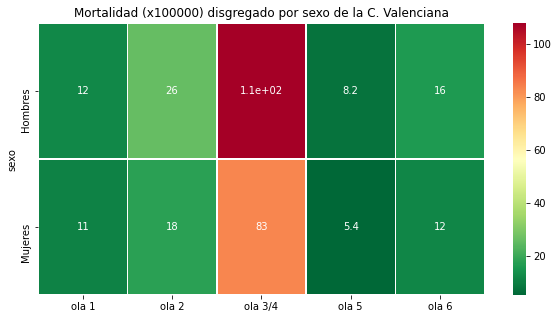

In [39]:
# Mapa de calor de la mortalidad por sexos para cada ola
#-------------------------------------------------------------------------------------------------------------

# Creamos el Dataframe donde vamos a guardar los datos
data=[["Hombres"],["Mujeres"]]
mor_sexo=pd.DataFrame(data,columns=["sexo"])

# Creamos la tabla
sexo_fallecidos=["fallecidos_24h_hombre","fallecidos_24h_mujer"]
name_olas=["ola 1","ola 2","ola 3/4","ola 5", "ola 6"]
poblacion=[p_hombre,p_mujer]

for j in range(len(olas_CV)):
    temp=[None]*len(sexo_fallecidos)
    for i in range(len(sexo_fallecidos)):
        temp[i]=(data_CV_hombre_mujer[olas_CV[j][0]:olas_CV[j][1]][sexo_fallecidos[i]].sum()*1e5)/poblacion[i]
    mor_sexo[name_olas[j]]=temp

mor_sexo=mor_sexo.set_index("sexo")   

fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(mor_sexo, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Mortalidad (x100000) disgregado por sexo de la C. Valenciana")

Text(0.5, 1.0, 'Letalidad (%) disgregado por sexo de la C. Valenciana')

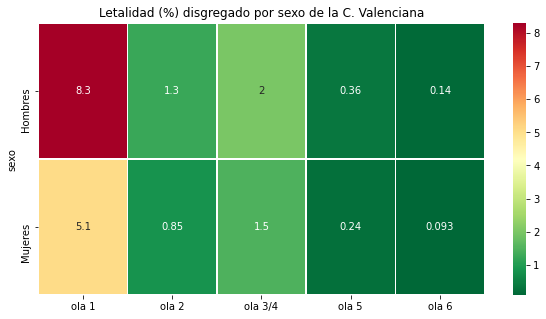

In [40]:
# Mapa de calor de la letalidad por sexos para cada ola
#-------------------------------------------------------------------------------------------------------------

# Creamos el Dataframe donde vamos a guardar los datos
data=[["Hombres"],["Mujeres"]]
let_sexo=pd.DataFrame(data,columns=["sexo"])

# Creamos la tabla
sexo_casos=["casos_24h_hombre","casos_24h_mujer"]
sexo_fallecidos=["fallecidos_24h_hombre","fallecidos_24h_mujer"]
name_olas=["ola 1","ola 2","ola 3/4","ola 5", "ola 6"]


for j in range(len(olas_CV)):
    temp=[None]*len(sexo_casos)
    for i in range(len(sexo_casos)):
        temp[i]=(data_CV_hombre_mujer[olas_CV[j][0]:olas_CV[j][1]][sexo_fallecidos[i]].sum()
                 /data_CV_hombre_mujer[olas_CV[j][0]:olas_CV[j][1]][sexo_casos[i]].sum())*100
    let_sexo[name_olas[j]]=temp

let_sexo=let_sexo.set_index("sexo")   

fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(let_sexo, annot=True, linewidths=0.5,cmap='RdYlGn_r',ax=ax)
plt.title("Letalidad (%) disgregado por sexo de la C. Valenciana")